Our expectations on tax and transparency rest on three main principles:
1. Taxes should be paid where economic value is generated
2. Company tax arrangements are a board responsibility 
3. Public country-by-country reporting is a core element of transparent corporate tax disclosure

Multinational enterprises should be ready
publicly to explain the business case for
locating subsidiaries in “closed” jurisdictions,
significantly low-tax environments, or
countries where no local employees carry out
substantive business functions or the number
of such employees is disproportionately low
compared to the economic value generation
attributed to that part of the business. 

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns

In [122]:
df = pd.read_excel('ESG Analytics - Tax risk case data.xlsx', sheet_name = 'Dataset')

In [705]:
df.head()

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
0,148145,Bermuda,Financials,Banks,1.614332e+10,52.391773,76.832289,13.0,91.0,452.549037,1,37,14.081953,1.589625,0.558060,0.850006,0.966495,23.720833,NaN
1,942223,Switzerland,Financials,Asset Managers and Custodians,4.322148e+11,99.915761,48.979152,24.0,609.0,452.549037,1,16,14.081953,13.341955,12.426958,1.190929,2.376466,23.720833,0.0
2,102259,United States,Telecommunications,Telecommunications Services,6.008532e+09,73.156744,42.560447,9.0,73.0,103.183594,1,14,2.270270,861.290323,201.564510,369.684277,814.655686,11.555537,0.0
3,103810,United States,Financials,Asset Managers and Custodians,8.133451e+09,43.998991,42.116051,9.0,1096.0,452.549037,1,35,14.081953,-1.229345,1769.776993,3882.954825,-54.155806,23.720833,0.0
4,1704420,Thailand,Technology,Computer Hardware,4.184088e+09,52.671237,33.618329,10.0,23.0,58.097653,1,1,1.107376,51.318007,26.785589,16.406446,34.567125,41.124792,NaN


<AxesSubplot:title={'center':'N companies per sector'}>

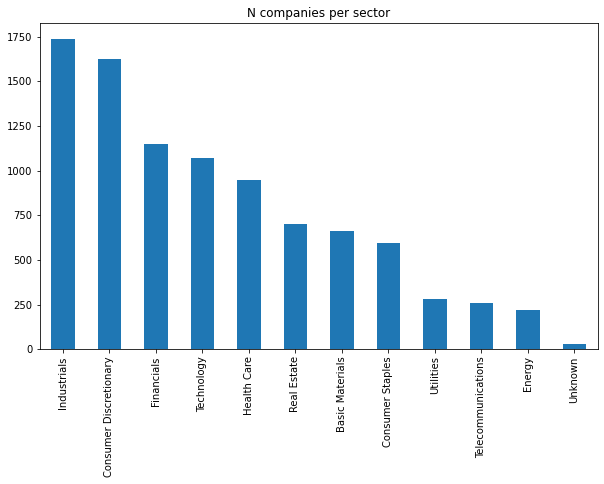

In [124]:
df.sector.value_counts().plot(figsize = (10,6), kind = 'bar', title = "N companies per sector")

In [125]:
# avg_sector_subs_count: Average number of subsidiaries in sector
#    Indicates degree of complexity of business structure 
#
# subs_zt_sector_avg: Average number of subsidiaries for the sector in zero-tax jurisdiction 
#    Some sectors are more likely to have structures in zero-tax jurisdictions

# Checking if indeed only one value per sector of "avg_sector_subs_count", "subs_zt_sector_avg"
# 
# print(df.avg_sector_subs_count.unique(), len(df.avg_sector_subs_count.unique()))
# print(df.subs_zt_sector_avg.unique(), len(df.subs_zt_sector_avg.unique()))
# 
# OK and matches with df under

df_sector_subs_avgs = df[["sector", "avg_sector_subs_count", "subs_zt_sector_avg"]].groupby(by = "sector").mean()

In [126]:
df_sector_subs_avgs["avg_pct_zt"] = df_sector_subs_avgs["subs_zt_sector_avg"]/df_sector_subs_avgs["avg_sector_subs_count"]
df_sector_subs_avgs.columns = ["subsidiary count", "zero-tax subsidiaries", "zero-tax subsidiaries (%)"]

In [127]:
df_sector_subs_avgs.sort_values(by = "zero-tax subsidiaries (%)", ascending = False).style.format({'zero-tax subsidiaries (%)': '{:,.2%}'.format})

,subsidiary count,zero-tax subsidiaries,zero-tax subsidiaries (%)
sector,,,
Financials,452.549037,14.081953,3.11%
Energy,106.396313,3.050459,2.87%
Telecommunications,103.183594,2.270270,2.20%
Technology,58.097653,1.107376,1.91%
Real Estate,165.906250,2.455966,1.48%
Consumer Discretionary,79.776675,1.079951,1.35%
Utilities,92.505300,1.161972,1.26%
Industrials,96.353009,1.167338,1.21%
Consumer Staples,66.354622,0.730318,1.10%


In [128]:
df.subsector.value_counts()

Banks                                             490
Real Estate Holding and Development               317
Biotechnology                                     316
Pharmaceuticals                                   263
Software                                          251
                                                 ... 
Timber REITs                                        3
Coal                                                3
Diamonds and Gemstones                              2
Oil: Crude Producers                                1
Open End and Miscellaneous Investment Vehicles      1
Name: subsector, Length: 171, dtype: int64

In [129]:
df_sector = df.groupby(by = "sector").mcap_nok.sum()/1000000000

df_sector.sort_values(ascending = True).plot(figsize = (10,10), kind = 'bar', logy = True)

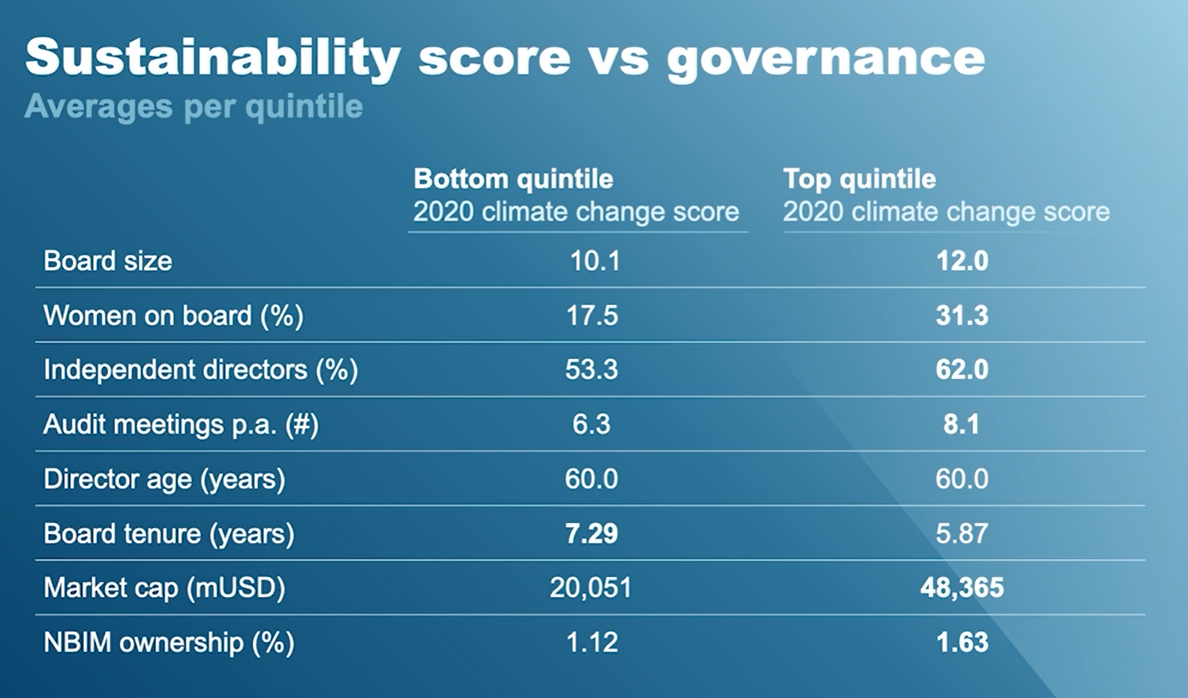

In [131]:
from IPython.display import Image
Image(filename='Mohn_1.png')
# Can we do similar analysis for tax-risk

In [132]:
# Correlation analysis:
#
# Candidate variables:
# 
# 1.
# 2.

In [133]:
df.head(1).transpose()

,0
organisation_code,148145
country_of_incorporation,Bermuda
sector,Financials
subsector,Banks
mcap_nok,1.61433e+10
rev_nonincorp,52.3918
rev_zt,76.8323
subs_country_count,13
subs_count,91
avg_sector_subs_count,452.549


In [134]:
df[df.rev_nonincorp < df.rev_zt]

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
0,148145,Bermuda,Financials,Banks,1.614332e+10,52.391773,76.832289,13.0,91.0,452.549037,Yes,37,14.081953,1.589625,0.55806,0.850006,0.966495,23.720833,NaN


In [135]:
df[df.country_of_incorporation == "Bermuda"]

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
0,148145,Bermuda,Financials,Banks,1.614332e+10,52.391773,76.832289,13.0,91.0,452.549037,Yes,37,14.081953,1.589625,0.558060,0.850006,0.966495,23.720833,NaN
5,21160716,Bermuda,Financials,Asset Managers and Custodians,1.103224e+11,69.022759,30.977241,6.0,90.0,452.549037,Yes,15,14.081953,12.919311,5.429374,7.631658,19.825021,23.720833,0.0
6,178104,Bermuda,Financials,Reinsurance,9.245042e+10,79.199375,20.800625,7.0,59.0,452.549037,Yes,14,14.081953,12.163342,31.940438,64.585703,2.752916,23.720833,0.0
10,170878,Bermuda,Financials,Full Line Insurance,1.818321e+11,85.723002,14.276998,19.0,185.0,452.549037,Yes,38,14.081953,7.816160,11.157971,6.526597,3.928799,23.720833,0.0
12,386467,Bermuda,Financials,Property and Casualty Insurance,3.186850e+10,86.457399,13.542601,10.0,216.0,452.549037,Yes,70,14.081953,11.658031,15.047159,6.468019,-1.714634,23.720833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535,9752462,Bermuda,Consumer Discretionary,Household Furnishings,8.900623e+10,100.000000,0.000000,8.0,42.0,79.776675,Yes,3,1.079951,19.789380,16.294743,4.079945,9.710051,12.430052,0.0
8717,202538,Bermuda,Industrials,Marine Transportation,1.747115e+10,NaN,NaN,7.0,74.0,96.353009,Yes,10,1.167338,-0.095246,0.024618,0.536921,-0.216829,31.912731,0.0
8789,36298045,Bermuda,Financials,Reinsurance,1.376387e+10,NaN,NaN,18.0,121.0,452.549037,Yes,21,14.081953,5.335404,5.448011,6.357165,-10.890770,23.720833,0.0
9241,69612635,Bermuda,Financials,Reinsurance,5.337569e+09,NaN,NaN,3.0,5.0,452.549037,Yes,4,14.081953,NaN,NaN,NaN,NaN,23.720833,NaN


In [136]:
df.country_of_incorporation.value_counts()

United States     1944
Japan             1507
South Korea        522
Taiwan             458
Cayman Islands     347
                  ... 
Curacao              2
Liberia              1
Iceland              1
Gibraltar            1
Unknown              1
Name: country_of_incorporation, Length: 80, dtype: int64

In [137]:
df["2020_etr"].loc[(df["2020_etr"]!=0) & (df["2020_etr"].notnull())]


0         1.589625
1        13.341955
2       861.290323
3        -1.229345
4        51.318007
           ...    
9269     39.843313
9272     25.870647
9273     41.042542
9278     20.553006
9279      0.841555
Name: 2020_etr, Length: 8288, dtype: float64

<AxesSubplot:>

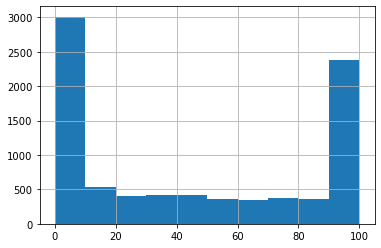

In [138]:
df[df.rev_nonincorp <100.1].rev_nonincorp.hist()

<AxesSubplot:>

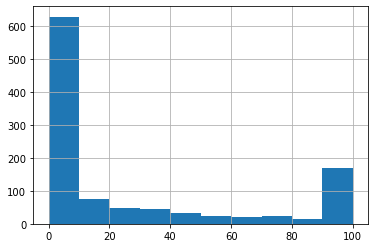

In [139]:
df[(df.rev_nonincorp <100.1) & (df.sector == "Financials")].rev_nonincorp.hist()

In [140]:
df.subs_zt.value_counts(dropna = False)

No     6963
Yes    2318
Name: subs_zt, dtype: int64

In [141]:
df = df.replace(["Yes","No"],[1,0])

In [142]:
df.count_tax_controversy.value_counts(dropna = False)

0.0     6683
NaN     2390
1.0      141
2.0       31
3.0       17
5.0        8
4.0        5
6.0        3
8.0        1
7.0        1
12.0       1
Name: count_tax_controversy, dtype: int64

Tax relevant information includes effective tax rates, share of foreign revenues earned, share of revenue earned in zero-tax jurisdictions, the number of subsidiaries that a company has located in a zero-tax jurisdiction, and whether the company has been involved in a tax controversy, etc. Note that a value of “0” may identify a missing value / not applicable / zero value

In [143]:
df.head().transpose()

,0,1,2,3,4
organisation_code,148145,942223,102259,103810,1704420
country_of_incorporation,Bermuda,Switzerland,United States,United States,Thailand
sector,Financials,Financials,Telecommunications,Financials,Technology
subsector,Banks,Asset Managers and Custodians,Telecommunications Services,Asset Managers and Custodians,Computer Hardware
mcap_nok,1.61433e+10,4.32215e+11,6.00853e+09,8.13345e+09,4.18409e+09
rev_nonincorp,52.3918,99.9158,73.1567,43.999,52.6712
rev_zt,76.8323,48.9792,42.5604,42.1161,33.6183
subs_country_count,13,24,9,9,10
subs_count,91,609,73,1096,23
avg_sector_subs_count,452.549,452.549,103.184,452.549,58.0977


In [144]:
1.2e+13/df.mcap_nok.sum() # Mye mindre enn  

2.3631951639422064e-05

In [147]:
# df.mcap_nok.plot(figsize = (10,6), kind='bar', logx = True)

In [153]:
df.loc[df.mcap_nok.isnull()]

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
361,1197767,Germany,Industrials,Transaction Processing Services,NaN,92.074486,0.104787,28.0,73.0,96.353009,0,0,1.167338,NaN,NaN,NaN,NaN,31.912731,NaN
3128,11526408,Malaysia,Basic Materials,Iron and Steel,NaN,4.865726,0.000000,3.0,9.0,65.169954,0,0,0.624811,21.791642,24.180640,3.400320,-6.607444,19.827603,NaN
3416,11774751,Tunisia,Health Care,Pharmaceuticals,NaN,2.999181,0.000000,1.0,1.0,65.566845,0,0,0.650475,45.608802,23.414664,13.190624,26.422108,17.203203,NaN
3828,128704,Thailand,Health Care,Health Care Facilities,NaN,0.000000,0.000000,1.0,9.0,65.566845,0,0,0.650475,17.076574,18.724775,2.679667,-3.890320,17.203203,NaN
4987,17244336,United States,Consumer Discretionary,Consumer Services: Misc.,NaN,17.755033,0.000000,NaN,NaN,79.776675,0,0,1.079951,NaN,NaN,NaN,NaN,12.430052,NaN
5449,19410111,Malaysia,Industrials,Construction,NaN,12.468478,0.000000,1.0,3.0,96.353009,0,0,1.167338,46.932079,29.541864,9.764952,22.107073,31.912731,NaN
5562,203111,Spain,Energy,Renewable Energy Equipment,NaN,90.941590,0.000000,22.0,152.0,106.396313,0,0,3.050459,NaN,NaN,NaN,NaN,12.463874,NaN
5777,22349141,Tunisia,Consumer Discretionary,Clothing and Accessories,NaN,0.000000,0.000000,4.0,9.0,79.776675,0,0,1.079951,6.804185,4.332822,1.902703,3.140110,12.430052,NaN
5778,22349317,Tunisia,Consumer Discretionary,Recreational Vehicles and Boats,NaN,0.000000,0.000000,1.0,1.0,79.776675,0,0,1.079951,8.504065,8.474805,2.225546,3.091686,12.430052,NaN
5949,24721268,Tunisia,Consumer Staples,Food Products,NaN,0.000000,0.000000,3.0,5.0,66.354622,0,0,0.730318,32.933128,24.666808,5.048258,11.107488,28.465245,NaN


In [155]:
df.loc[df.mcap_nok.notnull()].mcap_nok.sort_values()

8662    7.742400e+01
9273    1.421588e+03
8645    1.655371e+04
8694    4.209521e+04
8722    5.789040e+04
            ...     
7284    3.084296e+15
60      5.247528e+15
9162    1.122347e+16
9129    1.252262e+16
8727    4.661024e+17
Name: mcap_nok, Length: 9253, dtype: float64

In [157]:
4.661024e+17/df.loc[df.mcap_nok.notnull()].mcap_nok.sum()

0.9179091146515463

In [158]:
df.loc[8727] #mcap is 92% of all companies. Right...

organisation_code                                         217210
country_of_incorporation                                   India
sector                                               Industrials
subsector                   Commercial Vehicle-Equipment Leasing
mcap_nok                                             4.66102e+17
rev_nonincorp                                                NaN
rev_zt                                                       NaN
subs_country_count                                             1
subs_count                                                     1
avg_sector_subs_count                                     96.353
subs_zt                                                        0
subs_zt_count                                                  0
subs_zt_sector_avg                                       1.16734
2020_etr                                                     NaN
avg_etr_2016_2020                                            NaN
stdev_etr_2016_2020      

In [159]:
df.loc[9129] # This one also seems off

organisation_code                         69209741
country_of_incorporation            Cayman Islands
sector                      Consumer Discretionary
subsector                                Cosmetics
mcap_nok                               1.25226e+16
rev_nonincorp                                  NaN
rev_zt                                         NaN
subs_country_count                               4
subs_count                                       8
avg_sector_subs_count                      79.7767
subs_zt                                          1
subs_zt_count                                    1
subs_zt_sector_avg                         1.07995
2020_etr                                       NaN
avg_etr_2016_2020                              NaN
stdev_etr_2016_2020                            NaN
delta_etr_2016_2020                            NaN
sector_avg_etr_2016_2020                   12.4301
count_tax_controversy                            0
Name: 9129, dtype: object

In [160]:
df.loc[9162] # This one is also off

organisation_code                   69393638
country_of_incorporation      Cayman Islands
sector                      Consumer Staples
subsector                            Tobacco
mcap_nok                         1.12235e+16
rev_nonincorp                            NaN
rev_zt                                   NaN
subs_country_count                         3
subs_count                                 3
avg_sector_subs_count                66.3546
subs_zt                                    1
subs_zt_count                              1
subs_zt_sector_avg                  0.730318
2020_etr                                 NaN
avg_etr_2016_2020                        NaN
stdev_etr_2016_2020                      NaN
delta_etr_2016_2020                      NaN
sector_avg_etr_2016_2020             28.4652
count_tax_controversy                      0
Name: 9162, dtype: object

In [161]:
df.loc[60] # could be amazon? Mcap ca 5e+14 = 50 000 Billion Dollar - NO

organisation_code                           302110
country_of_incorporation             United States
sector                      Consumer Discretionary
subsector                    Diversified Retailers
mcap_nok                               5.24753e+15
rev_nonincorp                              97.7862
rev_zt                                    0.861338
subs_country_count                              20
subs_count                                      45
avg_sector_subs_count                      79.7767
subs_zt                                          1
subs_zt_count                                    3
subs_zt_sector_avg                         1.07995
2020_etr                                    32.544
avg_etr_2016_2020                          33.9902
stdev_etr_2016_2020                          3.065
delta_etr_2016_2020                      -0.105394
sector_avg_etr_2016_2020                   12.4301
count_tax_controversy                            0
Name: 60, dtype: object

In [ ]:
# Largest company in the world by mcap: Apple 2.389T dollar = 24.090T nok = 24 090B nok = 2.41e+13 nok
# So companies with mcap larger than 2.41e+13 nok must be off

In [165]:
df.loc[df.mcap_nok > 2e+13].shape

(26, 19)

In [164]:
# Let's see where sectors get their revenues

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
0,148145,Bermuda,Financials,Banks,1.614332e+10,52.391773,76.832289,13.0,91.0,452.549037,1,37,14.081953,1.589625,0.558060,0.850006,0.966495,23.720833,NaN
1,942223,Switzerland,Financials,Asset Managers and Custodians,4.322148e+11,99.915761,48.979152,24.0,609.0,452.549037,1,16,14.081953,13.341955,12.426958,1.190929,2.376466,23.720833,0.0
2,102259,United States,Telecommunications,Telecommunications Services,6.008532e+09,73.156744,42.560447,9.0,73.0,103.183594,1,14,2.270270,861.290323,201.564510,369.684277,814.655686,11.555537,0.0
3,103810,United States,Financials,Asset Managers and Custodians,8.133451e+09,43.998991,42.116051,9.0,1096.0,452.549037,1,35,14.081953,-1.229345,1769.776993,3882.954825,-54.155806,23.720833,0.0
4,1704420,Thailand,Technology,Computer Hardware,4.184088e+09,52.671237,33.618329,10.0,23.0,58.097653,1,1,1.107376,51.318007,26.785589,16.406446,34.567125,41.124792,NaN


In [190]:
# Remove companies with mcap over 27T nok = 2.7e+13 (max mcap of AAPL)
df1 = df.loc[((df.mcap_nok < 2.7e+13) | (df.mcap_nok.isnull())) &  (~df.index.isin([9065]))] # index 9065 is a cayman island comp with >2T USD mcap

In [191]:
df1.loc[(df1.mcap_nok > 1e+13)]

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
920,46946968,United States,Technology,Consumer Digital Services,2.324460e+13,53.423877,0.031018,38.0,436.0,58.097653,1,1,1.107376,16.249324,22.865124,17.324259,-3.096432,41.124792,0.0
1546,100193,United States,Financials,Diversified Financial Services,1.008578e+13,15.726031,0.000000,50.0,1987.0,452.549037,1,11,14.081953,22.336739,-5.628163,49.291151,-5.108534,23.720833,0.0
1831,101695,United States,Technology,Computer Hardware,2.280398e+13,60.221846,0.000000,41.0,221.0,58.097653,1,2,1.107376,14.428165,19.765583,5.040238,-11.129093,41.124792,4.0
1842,101743,United States,Technology,Software,1.957533e+13,48.844527,0.000000,75.0,642.0,58.097653,1,3,1.107376,16.507655,20.921962,19.100246,1.556513,41.124792,0.0
5670,216952,United States,Consumer Discretionary,Diversified Retailers,1.633315e+13,31.741887,0.000000,27.0,393.0,79.776675,0,0,1.079951,11.841343,19.255144,10.449032,-24.772223,12.430052,3.0
6340,330089,South Korea,Real Estate,Real Estate Holding and Development,1.223056e+13,100.000000,0.000000,1.0,4.0,165.906250,0,0,2.455966,2.648040,14.528267,57.561154,-25.836517,5.290148,0.0
7864,7981718,South Korea,Technology,Electronic Components,1.778642e+13,100.000002,0.000000,1.0,1.0,58.097653,0,0,1.107376,-32.816408,-20.763591,29.705146,-26.166875,41.124792,NaN


In [192]:
global_mcap_nok = df1.mcap_nok.sum()
NBIM_size_nok = 12554185552074

print("{:,}".format(global_mcap_nok)) 
print("{:,}".format(NBIM_size_nok))
print("{:.2%}".format(NBIM_size_nok/global_mcap_nok))

1,065,197,234,122,615.9
12,554,185,552,074
1.18%


In [197]:
mcap_binned = pd.cut(df1.mcap_nok, bins = [0, 1e+9, 1e+10, 1e+11, 1e+12, 1e+13, 1e+14], labels = [
    "(0, 1e+9]", "(1e+9, 1e+10]","(1e+10, 1e+11]","(1e+11, 1e+12]","(1e+12, 1e+13]","(1e+13, 1e+14]"]).value_counts()

mcap_binned_df = pd.DataFrame(mcap_binned).reindex([
    "(0, 1e+9]", "(1e+9, 1e+10]","(1e+10, 1e+11]","(1e+11, 1e+12]","(1e+12, 1e+13]","(1e+13, 1e+14]"], axis=0)

mcap_binned_df.rename(columns={"mcap_nok" : "N comps"})
mcap_binned_df.index.name = "mcap_nok"

mcap_binned_df.plot(figsize = (10,10), kind = 'bar', ylabel = "N comps")

In [218]:
df1.groupby(by = "sector").agg({"rev_zt":['median', 'mean']})

rev_zt          
                       median      mean
sector                                 
Basic Materials           0.0  0.025727
Consumer Discretionary    0.0  0.033711
Consumer Staples          0.0  0.022422
Energy                    0.0  0.021004
Financials                0.0  0.306197
Health Care               0.0  0.048346
Industrials               0.0  0.032103
Real Estate               0.0  0.000785
Technology                0.0  0.063643
Telecommunications        0.0  0.223927
Unknown                   NaN       NaN
Utilities                 0.0  0.010710

In [222]:
pd.DataFrame([df1.groupby(by = "sector").size(),df1.groupby(by = "sector").mcap_nok.sum()])

TypeError: __init__() got an unexpected keyword argument 'axis'

In [225]:
df1.groupby(by = "sector").size().to_frame().join(df1.groupby(by = "sector").mcap_nok.sum())

,0,mcap_nok
sector,,
Basic Materials,661,4.720095e+13
Consumer Discretionary,1617,1.778067e+14
Consumer Staples,595,6.220890e+13
Energy,218,3.327188e+13
Financials,1146,1.690180e+14
Health Care,940,1.065760e+14
Industrials,1737,1.299963e+14
Real Estate,701,4.674640e+13
Technology,1071,2.263612e+14


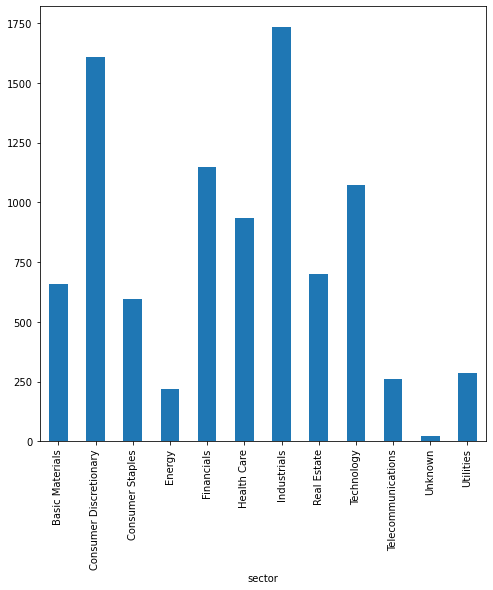

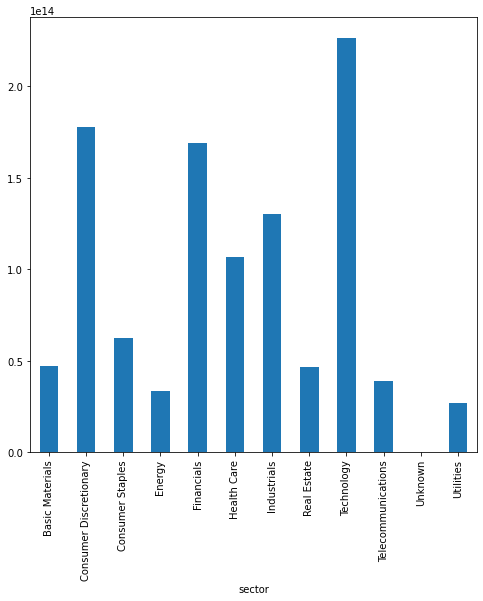

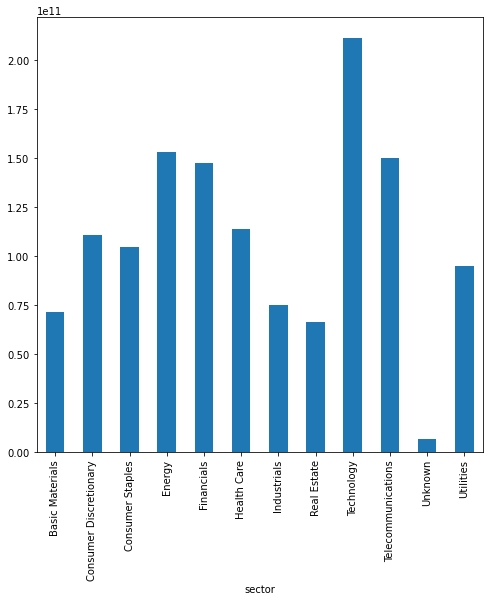

In [234]:
import matplotlib.pyplot as plt

df1_mcap_stats = df1.groupby(by = "sector").agg({"mcap_nok":['count', 'sum', 'mean']})
for i, s in enumerate(df1_mcap_stats):
    df1_mcap_stats[s].plot(kind='bar', figsize=(8, 8))
    plt.show()

In [237]:
df1.groupby(by = "sector").rev_zt.describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Financials,1087.0,0.306197,3.408120,0.0,0.0,0.0,0.000000,76.832289
Telecommunications,241.0,0.223927,2.758559,0.0,0.0,0.0,0.000000,42.560447
Technology,972.0,0.063643,1.096775,0.0,0.0,0.0,0.000000,33.618329
Health Care,807.0,0.048346,0.537347,0.0,0.0,0.0,0.000000,13.870540
Consumer Discretionary,1500.0,0.033711,0.438413,0.0,0.0,0.0,0.000000,16.252032
Industrials,1655.0,0.032103,0.416977,0.0,0.0,0.0,0.000000,16.376092
Basic Materials,635.0,0.025727,0.092835,0.0,0.0,0.0,0.010929,1.009546
Consumer Staples,568.0,0.022422,0.263357,0.0,0.0,0.0,0.000000,6.150260
Energy,198.0,0.021004,0.082931,0.0,0.0,0.0,0.000000,0.704942


In [240]:
df1.loc[(df1.sector == "Financials") & (df1.rev_zt > 0)].rev_zt.describe()

count    99.000000
mean      3.361985
std      10.878326
min       0.010060
25%       0.032407
50%       0.093272
75%       0.458707
max      76.832289
Name: rev_zt, dtype: float64

In [253]:
sector_avg_coulmns = [col for col in df1.columns if "sector" in col and col !='subsector']
sector_avg_coulmns

['sector',
 'avg_sector_subs_count',
 'subs_zt_sector_avg',
 'sector_avg_etr_2016_2020']

In [256]:
df1_sector = df1[sector_avg_coulmns].drop_duplicates()

In [259]:
df1_sector.columns = ["sector", "subs_count", "subs_zt", "etr_16_20"]

In [261]:
df1_sector.set_index("sector")

,subs_count,subs_zt,etr_16_20
sector,,,
Financials,452.549037,14.081953,23.720833
Telecommunications,103.183594,2.270270,11.555537
Technology,58.097653,1.107376,41.124792
Industrials,96.353009,1.167338,31.912731
Consumer Discretionary,79.776675,1.079951,12.430052
Health Care,65.566845,0.650475,17.203203
Consumer Staples,66.354622,0.730318,28.465245
Utilities,92.505300,1.161972,19.680775
Basic Materials,65.169954,0.624811,19.827603


In [ ]:
# to add to df1_sector:
# avg number of controversies
# total mcap BNOK
# avg mcap BNOK
# n comp
# Degree of complexity
# 
# Sector rank on: 
#    1. Size and n comp
#    2. Complexity (combined score)
#    3. ZT link    (combined score)
#    4. ETR risk   (combined score)
#    5. Reputation (controversies)
#
#

In [263]:
df1.columns

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy'],
      dtype='object')

In [407]:
df1_sector_stats = df1.groupby(by = "sector", dropna=False).agg({"mcap_nok":["count","median", "sum"], 
                                "rev_nonincorp":["mean"], 
                                "rev_zt":["mean"], 
                                "subs_country_count":["mean"],
                                #"subs_count":["mean"],
                                "avg_sector_subs_count":["first"],
                                "subs_zt":"mean",
                                #"subs_zt_count":"mean",
                                "subs_zt_sector_avg":"first",
                                "2020_etr":"mean",
                                #"avg_etr_2016_2020":"mean",
                                "stdev_etr_2016_2020":"mean",
                                "delta_etr_2016_2020":"mean",
                                "sector_avg_etr_2016_2020":"first",
                                "count_tax_controversy":"mean"})

df1_sector_stats.columns.droplevel()
df1_sector_stats.columns = ["mcap_nok_count", 
                                "mcap_nok_median", 
                                "mcap_nok_sum", 
                                "rev_nonincorp_mean",
                                "rev_zt_mean", 
                                "subs_country_count_mean",
                                "avg_sector_subs_count_first",
                                "subs_zt_mean",
                                "subs_zt_sector_avg_first",
                                "2020_etr_mean",
                                "stdev_etr_2016_2020_mean",
                                "delta_etr_2016_2020_mean",
                                "sector_avg_etr_2016_2020_first",
                                "count_tax_controversy_mean"]

df_sector_stats = df1_sector_stats.copy()

for col in ["mcap_nok_median", "mcap_nok_sum"]:
    df1_sector_stats[col] = (df1_sector_stats[col]/1000000000).round(1)#.map('{:,}'.format)
    df1_sector_stats = df1_sector_stats.rename(columns={col: col.replace("nok","Bnok")})
    
df1_sector_stats["rev_nonincorp_mean"] = (df1_sector_stats["rev_nonincorp_mean"]/100).map('{:,.2%}'.format)
df1_sector_stats["rev_zt_mean"] = (df1_sector_stats["rev_zt_mean"]/100).map('{:,.2%}'.format)

df1_sector_stats["subs_zt_mean"] = df1_sector_stats["subs_zt_mean"].map('{:,.2%}'.format)
df1_sector_stats["count_tax_controversy_mean"] = df1_sector_stats["count_tax_controversy_mean"].map('{:,.2%}'.format)

for col in ["subs_country_count_mean", "avg_sector_subs_count_first", "subs_zt_sector_avg_first", "2020_etr_mean", "stdev_etr_2016_2020_mean", "delta_etr_2016_2020_mean", "sector_avg_etr_2016_2020_first"]:
    df1_sector_stats[col] = df1_sector_stats[col].round(1)#.map('{:,}'.format)
    
df1_sector_stats.sort_values("mcap_Bnok_sum", ascending = False)



d = {"Sector Size": 3, "Revenues": 2, "Complexity": 2, "Zero-Tax Link": 2, "Effective Tax Rate": 4, "Reputation": 1}

level1_cols = []

for key in d:
     for x in ((key+"_")*d[key]).split("_")[:-1]:
            level1_cols.append(x)

cols = pd.MultiIndex.from_tuples(zip(level1_cols,list(df1_sector_stats.columns)),)

df1_sector_stats.columns = cols

In [408]:
pd.DataFrame(df1_sector_stats.loc[["Financials","Technology", "Consumer Discretionary"]]).transpose()

sector                                            Financials Technology  \
Sector Size        mcap_nok_count                       1146       1071   
                   mcap_Bnok_median                     29.4       20.1   
                   mcap_Bnok_sum                      169018     226361   
Revenues           rev_nonincorp_mean                 27.98%     62.42%   
                   rev_zt_mean                         0.31%      0.06%   
Complexity         subs_country_count_mean               9.8       11.1   
                   avg_sector_subs_count_first         452.5       58.1   
Zero-Tax Link      subs_zt_mean                       41.71%     28.20%   
                   subs_zt_sector_avg_first             14.1        1.1   
Effective Tax Rate 2020_etr_mean                        18.5      144.5   
                   stdev_etr_2016_2020_mean               34      119.1   
                   delta_etr_2016_2020_mean             -7.6      125.4   
                   sector_avg_etr_2016_2020_first       23.7       41.1   
Reputation         count_tax_controversy_mean          5.23%      2.97%   

sector                                            Consumer Discretionary  
Sector Size        mcap_nok_count                                   1607  
                   mcap_Bnok_median                                 16.4  
                   mcap_Bnok_sum                                  177807  
Revenues           rev_nonincorp_mean                             44.63%  
                   rev_zt_mean                                     0.03%  
Complexity         subs_country_count_mean                           9.8  
                   avg_sector_subs_count_first                      79.8  
Zero-Tax Link      subs_zt_mean                                   22.82%  
                   subs_zt_sector_avg_first                          1.1  
Effective Tax Rate 2020_etr_mean                                    42.3  
                   stdev_etr_2016_2020_mean                         90.2  
                   delta_etr_2016_2020_mean                         25.8  
                   sector_avg_etr_2016_2020_first                   12.4  
Reputation         count_tax_controversy_mean                      5.54%

In [405]:
df_financials = df1.loc[df1.sector == "Financials"]

In [406]:
df_financials

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
0,148145,Bermuda,Financials,Banks,1.614332e+10,52.391773,76.832289,13.0,91.0,452.549037,1,37,14.081953,1.589625,0.558060,0.850006,0.966495,23.720833,NaN
1,942223,Switzerland,Financials,Asset Managers and Custodians,4.322148e+11,99.915761,48.979152,24.0,609.0,452.549037,1,16,14.081953,13.341955,12.426958,1.190929,2.376466,23.720833,0.0
3,103810,United States,Financials,Asset Managers and Custodians,8.133451e+09,43.998991,42.116051,9.0,1096.0,452.549037,1,35,14.081953,-1.229345,1769.776993,3882.954825,-54.155806,23.720833,0.0
5,21160716,Bermuda,Financials,Asset Managers and Custodians,1.103224e+11,69.022759,30.977241,6.0,90.0,452.549037,1,15,14.081953,12.919311,5.429374,7.631658,19.825021,23.720833,0.0
6,178104,Bermuda,Financials,Reinsurance,9.245042e+10,79.199375,20.800625,7.0,59.0,452.549037,1,14,14.081953,12.163342,31.940438,64.585703,2.752916,23.720833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9241,69612635,Bermuda,Financials,Reinsurance,5.337569e+09,NaN,NaN,3.0,5.0,452.549037,1,4,14.081953,NaN,NaN,NaN,NaN,23.720833,NaN
9247,69631082,United States,Financials,Insurance Brokers,7.979618e+10,NaN,NaN,5.0,25.0,452.549037,0,0,14.081953,NaN,NaN,NaN,NaN,23.720833,NaN
9250,69634375,Nigeria,Financials,Banks,1.793632e+10,NaN,NaN,1.0,1.0,452.549037,0,0,14.081953,15.395165,15.910299,2.259437,-4.500989,23.720833,NaN
9274,8521084,India,Financials,Asset Managers and Custodians,1.577519e+10,NaN,NaN,9.0,576.0,452.549037,1,6,14.081953,NaN,NaN,NaN,NaN,23.720833,NaN


In [410]:
# Fix this to iclude subsector averages (dropped for sector)
df_financials_subsector_stats = df_financials.groupby(by = "subsector", dropna=False).agg({"mcap_nok":["count","median", "sum"], 
                                "rev_nonincorp":["mean"], 
                                "rev_zt":["mean"], 
                                "subs_country_count":["mean"],
                                #"subs_count":["mean"],
                                "avg_sector_subs_count":["first"],
                                "subs_zt":"mean",
                                #"subs_zt_count":"mean",
                                "subs_zt_sector_avg":"first",
                                "2020_etr":"mean",
                                #"avg_etr_2016_2020":"mean",
                                "stdev_etr_2016_2020":"mean",
                                "delta_etr_2016_2020":"mean",
                                "sector_avg_etr_2016_2020":"first",
                                "count_tax_controversy":"mean"})

df_financials_subsector_stats.columns.droplevel()
df_financials_subsector_stats.columns = ["mcap_nok_count", 
                                "mcap_nok_median", 
                                "mcap_nok_sum", 
                                "rev_nonincorp_mean",
                                "rev_zt_mean", 
                                "subs_country_count_mean",
                                "avg_sector_subs_count_first",
                                "subs_zt_mean",
                                "subs_zt_sector_avg_first",
                                "2020_etr_mean",
                                "stdev_etr_2016_2020_mean",
                                "delta_etr_2016_2020_mean",
                                "sector_avg_etr_2016_2020_first",
                                "count_tax_controversy_mean"]

# df_sector_stats = df1_sector_stats.copy()

for col in ["mcap_nok_median", "mcap_nok_sum"]:
    df_financials_subsector_stats[col] = (df_financials_subsector_stats[col]/1000000000).round(1)#.map('{:,}'.format)
    df_financials_subsector_stats = df_financials_subsector_stats.rename(columns={col: col.replace("nok","Bnok")})
    
df_financials_subsector_stats["rev_nonincorp_mean"] = (df_financials_subsector_stats["rev_nonincorp_mean"]/100).map('{:,.2%}'.format)
df_financials_subsector_stats["rev_zt_mean"] = (df_financials_subsector_stats["rev_zt_mean"]/100).map('{:,.2%}'.format)

df_financials_subsector_stats["subs_zt_mean"] = df_financials_subsector_stats["subs_zt_mean"].map('{:,.2%}'.format)
df_financials_subsector_stats["count_tax_controversy_mean"] = df_financials_subsector_stats["count_tax_controversy_mean"].map('{:,.2%}'.format)

for col in ["subs_country_count_mean", "avg_sector_subs_count_first", "subs_zt_sector_avg_first", "2020_etr_mean", "stdev_etr_2016_2020_mean", "delta_etr_2016_2020_mean", "sector_avg_etr_2016_2020_first"]:
    df_financials_subsector_stats[col] = df_financials_subsector_stats[col].round(1)#.map('{:,}'.format)
    
df_financials_subsector_stats.sort_values("mcap_Bnok_sum", ascending = False)



d = {"Sector Size": 3, "Revenues": 2, "Complexity": 2, "Zero-Tax Link": 2, "Effective Tax Rate": 4, "Reputation": 1}

level1_cols = []

for key in d:
     for x in ((key+"_")*d[key]).split("_")[:-1]:
            level1_cols.append(x)

cols = pd.MultiIndex.from_tuples(zip(level1_cols,list(df_financials_subsector_stats.columns)),)

df_financials_subsector_stats.columns = cols

df_financials_subsector_stats

Sector Size  \
                                               mcap_nok_count   
subsector                                                       
Asset Managers and Custodians                             118   
Banks                                                     489   
Closed End Investments                                      5   
Consumer Lending                                           58   
Diversified Financial Services                             74   
Financial Data Providers                                   19   
Full Line Insurance                                        42   
Insurance Brokers                                          11   
Investment Services                                       115   
Life Insurance                                             70   
Mortgage Finance                                           33   
Mortgage REITs: Commercial                                  5   
Mortgage REITs: Diversified                                 4   
Mortgage REITs: Residential                                 8   
Open End and Miscellaneous Investment Vehicles              1   
Property and Casualty Insurance                            78   
Reinsurance                                                16   

                                                                               \
                                               mcap_Bnok_median mcap_Bnok_sum   
subsector                                                                       
Asset Managers and Custodians                              29.0       11826.5   
Banks                                                      31.6       87962.5   
Closed End Investments                                     62.0        1209.7   
Consumer Lending                                           17.4        1590.4   
Diversified Financial Services                             30.0       15893.1   
Financial Data Providers                                   30.7        4441.2   
Full Line Insurance                                        34.8        5132.1   
Insurance Brokers                                          79.8        3532.6   
Investment Services                                        18.1       16649.3   
Life Insurance                                             89.7       10911.7   
Mortgage Finance                                           18.2        1445.2   
Mortgage REITs: Commercial                                 15.9          99.3   
Mortgage REITs: Diversified                                14.8         109.7   
Mortgage REITs: Residential                                23.5         292.5   
Open End and Miscellaneous Investment Vehicles              0.9           0.9   
Property and Casualty Insurance                            40.1        6562.4   
Reinsurance                                                45.0        1359.0   

                                                         Revenues              \
                                               rev_nonincorp_mean rev_zt_mean   
subsector                                                                       
Asset Managers and Custodians                              40.06%       1.45%   
Banks                                                      19.77%       0.19%   
Closed End Investments                                     20.00%       0.00%   
Consumer Lending                                           17.36%       0.00%   
Diversified Financial Services                             37.32%       0.05%   
Financial Data Providers                                   54.31%       0.03%   
Full Line Insurance                                        27.57%       0.37%   
Insurance Brokers                                          32.20%       0.00%   
Investment Services                                        40.38%       0.01%   
Life Insurance                                             30.17%       0.21%   
Mortgage Finance                                           13.81%       0.0

Correlation analysis

In [415]:
df_financials[["rev_nonincorp", "rev_zt"]].loc[df_financials.rev_zt > 0].corr()

,rev_nonincorp,rev_zt
rev_nonincorp,1.000000,-0.021595
rev_zt,-0.021595,1.000000


In [423]:
df_financials[["rev_nonincorp", "rev_zt", "subs_zt", "subs_zt_count", "subs_country_count"]].loc[df_financials.subs_zt > 0].head(10)

,rev_nonincorp,rev_zt,subs_zt,subs_zt_count,subs_country_count
0,52.391773,76.832289,1,37,13.0
1,99.915761,48.979152,1,16,24.0
3,43.998991,42.116051,1,35,9.0
5,69.022759,30.977241,1,15,6.0
6,79.199375,20.800625,1,14,7.0
7,87.160777,20.327559,1,12,17.0
10,85.723002,14.276998,1,38,19.0
12,86.457399,13.542601,1,70,10.0
14,97.775641,10.587955,1,36,6.0
15,91.175663,8.824337,1,24,16.0


• What is the company’s effective tax rate, and how does it compare to sector peers? (The effective tax rate is calculated as total income tax expense [current + deferred] divided by total pre-tax income. A low effective tax rate is a commonly used proxy for tax avoidance.)\
• What is the geographic distribution of the company’s revenues (i.e., does the company earn or report revenues in zero-tax jurisdictions)?\
• How is the company structured (i.e., what is the number of subsidiaries located in zero-tax jurisdictions)?

In [427]:
df_financials.columns

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy'],
      dtype='object')

<AxesSubplot:xlabel='avg_etr_2016_2020', ylabel='rev_zt'>

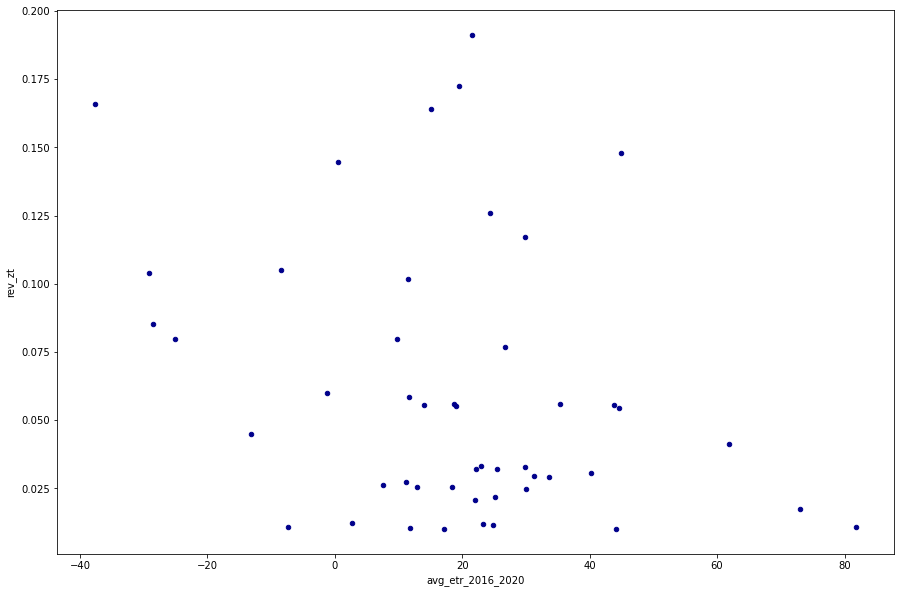

In [459]:
df_financials.loc[(df_financials.subs_zt>0) 
                  & (df_financials.avg_etr_2016_2020<200) 
                  #& (df_financials.avg_etr_2016_2020>-200)
                  & (df_financials.rev_zt>0)
                  & (df_financials.rev_zt<0.2)][['avg_etr_2016_2020','rev_zt']].plot.scatter(figsize=(15,10), x='avg_etr_2016_2020', y='rev_zt',c='DarkBlue')

In [460]:
df_financials.loc[(df_financials.subs_zt>0) 
                  & (df_financials.avg_etr_2016_2020<200) 
                  #& (df_financials.avg_etr_2016_2020>-200)
                  & (df_financials.rev_zt>0)
                  & (df_financials.rev_zt<0.2)][['avg_etr_2016_2020','rev_zt']].corr()

,avg_etr_2016_2020,rev_zt
avg_etr_2016_2020,1.000000,-0.307947
rev_zt,-0.307947,1.000000


In [465]:
df_financials[['mcap_nok','subs_country_count','subs_count']].corr()

,mcap_nok,subs_country_count,subs_count
mcap_nok,1.000000,0.494534,0.567184
subs_country_count,0.494534,1.000000,0.614035
subs_count,0.567184,0.614035,1.000000


In [469]:
df_financials.groupby('subs_zt').agg({'mcap_nok':['count','mean', 'median'], 
                                      'subs_zt_count':['mean', 'median', 'max'],
                                     'rev_zt':['mean']})

mcap_nok                             subs_zt_count              \
           count          mean        median          mean median  max   
subs_zt                                                                  
0            668  4.501258e+10  1.734166e+10      0.000000      0    0   
1            478  2.906895e+11  7.925930e+10     33.786611      5  940   

           rev_zt  
             mean  
subs_zt            
0        0.037866  
1        0.676107

In [474]:
df_financials.loc[(df_financials.subs_zt==0) & (df_financials.rev_zt>0)]#.rev_zt.value_counts(dropna = False)

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
13,29162241,Japan,Financials,Life Insurance,5.541379e+09,14.392227,13.362836,1.0,2.0,452.549037,0,0,14.081953,-0.166945,-0.299235,11.251398,-10.417991,23.720833,0.0
22,112149,United Kingdom,Financials,Asset Managers and Custodians,1.545166e+10,3.380608,3.380608,3.0,182.0,452.549037,0,0,14.081953,39.121497,28.058394,7.495317,15.239113,23.720833,0.0
25,330313,Taiwan,Financials,Banks,4.241617e+09,23.334881,2.264660,1.0,5.0,452.549037,0,0,14.081953,13.911292,9.126625,4.767982,5.869828,23.720833,0.0
33,29525656,South Africa,Financials,Asset Managers and Custodians,3.172662e+09,7.286245,1.511772,11.0,183.0,452.549037,0,0,14.081953,-48.638132,23.940090,41.774194,-83.176878,23.720833,0.0
61,117469,Belgium,Financials,Diversified Financial Services,1.714548e+11,97.623355,0.856790,48.0,406.0,452.549037,0,0,14.081953,14.698927,1.715900,48.148191,93.613002,23.720833,0.0
82,153124,Sweden,Financials,Diversified Financial Services,3.508769e+10,72.659176,0.542260,7.0,57.0,452.549037,0,0,14.081953,0.031764,0.117203,0.431323,0.532282,23.720833,0.0
112,1404304,Germany,Financials,Mortgage Finance,1.992191e+10,74.186047,0.396717,23.0,44.0,452.549037,0,0,14.081953,23.130170,19.902542,3.526066,-0.095895,23.720833,0.0
117,1456604,Australia,Financials,Financial Data Providers,1.901002e+10,55.345317,0.371217,12.0,102.0,452.549037,0,0,14.081953,24.418739,24.223354,1.414320,1.652198,23.720833,0.0
141,44041621,United Kingdom,Financials,Diversified Financial Services,2.419167e+10,91.627553,0.302094,12.0,225.0,452.549037,0,0,14.081953,-1.538462,-0.338156,1.012494,-2.475474,23.720833,0.0
220,998895,United States,Financials,Investment Services,1.757630e+11,56.054298,0.169249,8.0,21.0,452.549037,0,0,14.081953,20.029437,24.385388,6.090226,-14.119476,23.720833,0.0


In [476]:
# create ETR score, ZT link score, company complexity (larger is often more complex)
# Make datamodel
pd.DataFrame(df_financials.columns)

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy'],
      dtype='object')

Compexity score = (subs_country_count*subs_count)/np.log10(mcap_nok)

In [496]:
df_financials["Compexity score"] = (df_financials["subs_country_count"]*df_financials["subs_count"])/(np.log10(df_financials["mcap_nok"]))**2

<ipython-input-496-b00cbb0b9d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financials["Compexity score"] = (df_financials["subs_country_count"]*df_financials["subs_count"])/(np.log10(df_financials["mcap_nok"]))**2


<AxesSubplot:xlabel='mcap_nok', ylabel='Compexity score'>

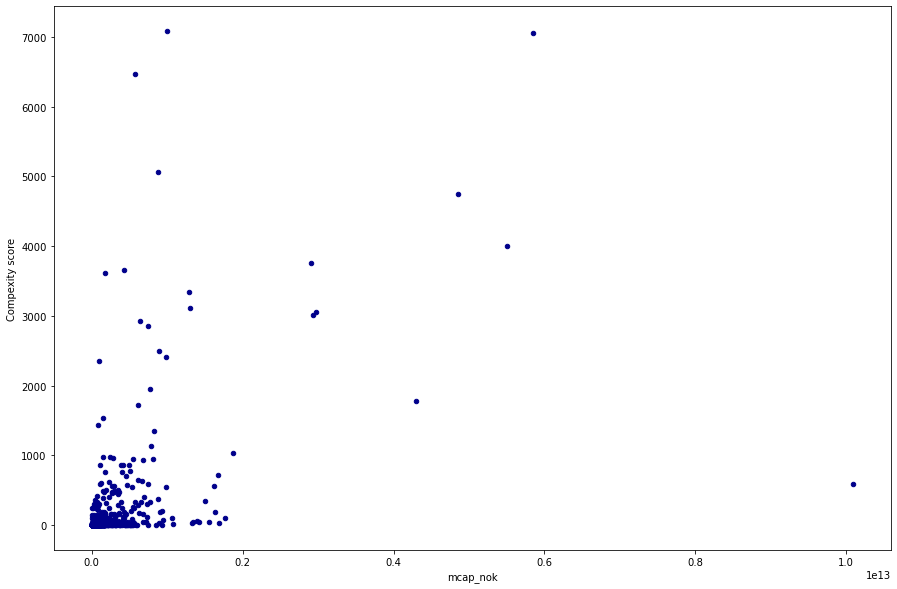

In [498]:
df_financials[["mcap_nok","Compexity score"]].plot.scatter(figsize=(15,10), x="mcap_nok",y="Compexity score",c='DarkBlue')

In [500]:
df_financials["log_mcap_nok"] = np.log10(df_financials["mcap_nok"])

<ipython-input-500-17fd2a5eae70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financials["log_mcap_nok"] = np.log10(df_financials["mcap_nok"])


<AxesSubplot:xlabel='log_mcap_nok', ylabel='subs_count'>

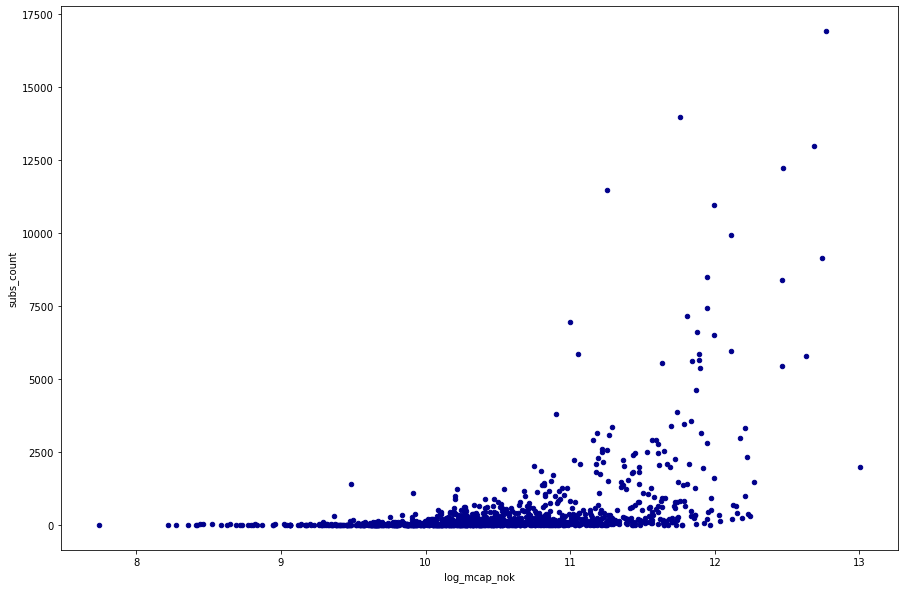

In [503]:
df_financials[["log_mcap_nok","subs_count"]].plot.scatter(figsize=(15,10), x="log_mcap_nok",y="subs_count",c='DarkBlue')

In [ ]:
mcap_binned = pd.cut(df_financials.mcap_nok, bins = [0, 1e+9, 1e+10, 1e+11, 1e+12, 1e+13, 1e+14], labels = [
    "(0, 1e+9]", "(1e+9, 1e+10]","(1e+10, 1e+11]","(1e+11, 1e+12]","(1e+12, 1e+13]","(1e+13, 1e+14]"]).value_counts()

mcap_binned_df = pd.DataFrame(mcap_binned).reindex([
    "(0, 1e+9]", "(1e+9, 1e+10]","(1e+10, 1e+11]","(1e+11, 1e+12]","(1e+12, 1e+13]","(1e+13, 1e+14]"], axis=0)

mcap_binned_df.rename(columns={"mcap_nok" : "N comps"})
mcap_binned_df.index.name = "mcap_nok"

mcap_binned_df.plot(figsize = (10,10), kind = 'bar', ylabel = "N comps")

In [509]:
df_financials["mcap_fin_binned"] = pd.cut(df_financials.mcap_nok, bins = [0, 1e+9, 1e+10, 1e+11, 1e+12, 1e+13, 1e+14], labels = [
    "(0, 1e+9]", "(1e+9, 1e+10]","(1e+10, 1e+11]","(1e+11, 1e+12]","(1e+12, 1e+13]","(1e+13, 1e+14]"])

<ipython-input-509-438f32ad1e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financials["mcap_fin_binned"] = pd.cut(df_financials.mcap_nok, bins = [0, 1e+9, 1e+10, 1e+11, 1e+12, 1e+13, 1e+14], labels = [


<AxesSubplot:xlabel='mcap_fin_binned'>

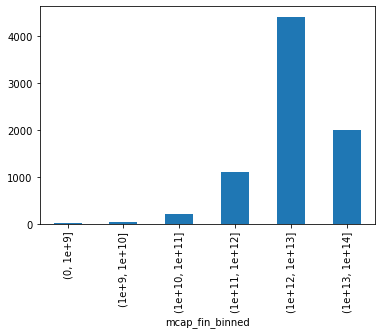

In [514]:
df_financials.groupby(by="mcap_fin_binned").subs_count.mean().plot.bar()

<AxesSubplot:xlabel='mcap_fin_binned'>

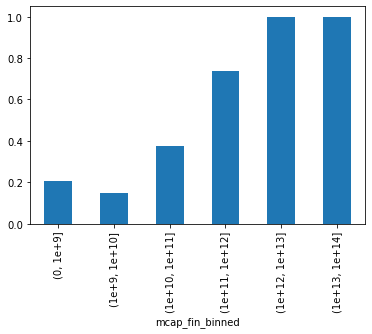

In [515]:
df_financials.groupby(by="mcap_fin_binned").subs_zt.mean().plot.bar()

<AxesSubplot:xlabel='mcap_fin_binned'>

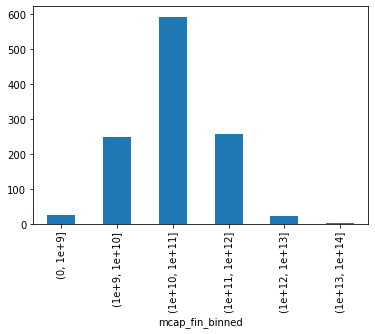

In [516]:
df_financials.groupby(by="mcap_fin_binned").size().plot.bar()

<AxesSubplot:xlabel='mcap_fin_binned'>

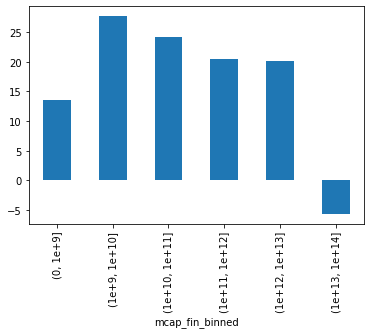

In [517]:
df_financials.groupby(by="mcap_fin_binned").avg_etr_2016_2020.mean().plot.bar()

<AxesSubplot:xlabel='mcap_fin_binned'>

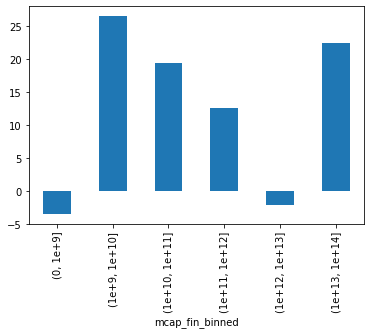

In [521]:
df_financials.groupby(by="mcap_fin_binned").ETR_20.mean().plot.bar()

In [520]:
df_financials = df_financials.rename(columns = {"2020_etr":"ETR_20"})

<AxesSubplot:xlabel='subs_zt'>

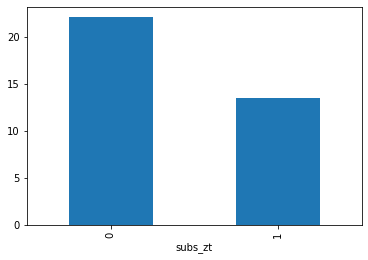

In [522]:
df_financials.groupby(by="subs_zt").ETR_20.mean().plot.bar()

<AxesSubplot:xlabel='subs_zt'>

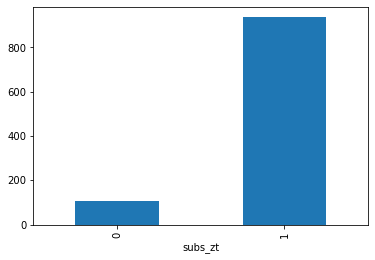

In [523]:
df_financials.groupby(by="subs_zt").subs_count.mean().plot.bar()

<AxesSubplot:xlabel='subs_zt'>

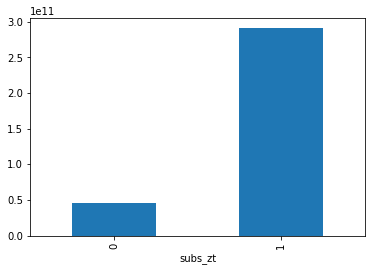

In [524]:
df_financials.groupby(by="subs_zt").mcap_nok.mean().plot.bar()

In [525]:
df_financials.columns

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', 'ETR_20', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy', 'Compexity score',
       'log_mcap_nok', 'mcap_fin_binned'],
      dtype='object')

<AxesSubplot:xlabel='subs_count', ylabel='ETR_20'>

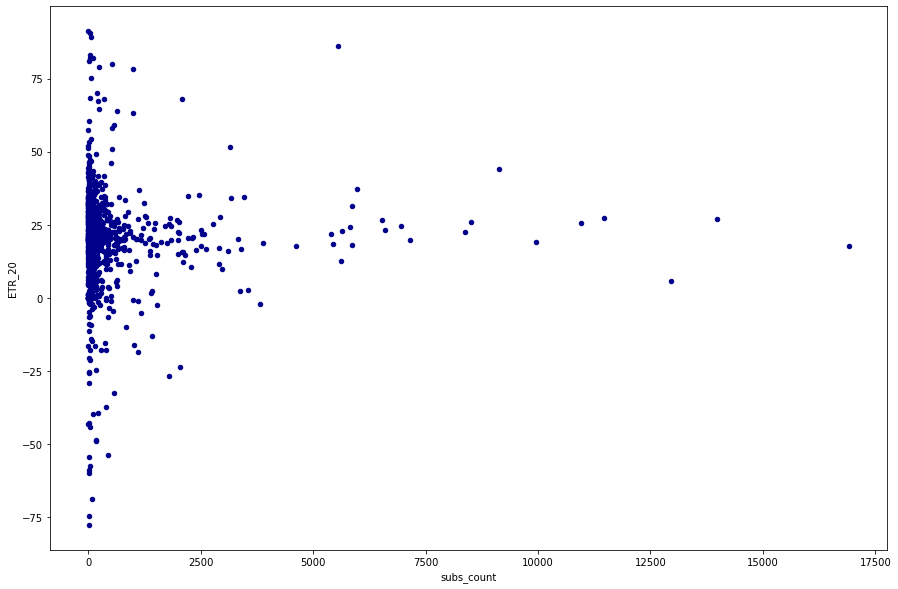

In [533]:
df_financials.loc[(df_financials.ETR_20 >  -100) & (df_financials.ETR_20 <  100)][["subs_count","ETR_20"]].plot.scatter(figsize=(15,10), x="subs_count",y="ETR_20",c='DarkBlue')

In [531]:
pd.DataFrame(df_financials.loc[(df_financials.ETR_20 >  -100) & (df_financials.ETR_20 <  100)].ETR_20.describe())

,ETR_20
count,1068.000000
mean,20.173302
std,17.061487
min,-77.847835
25%,14.425187
50%,21.174146
75%,28.032347
max,91.253029


<AxesSubplot:xlabel='subs_count', ylabel='avg_etr_2016_2020'>

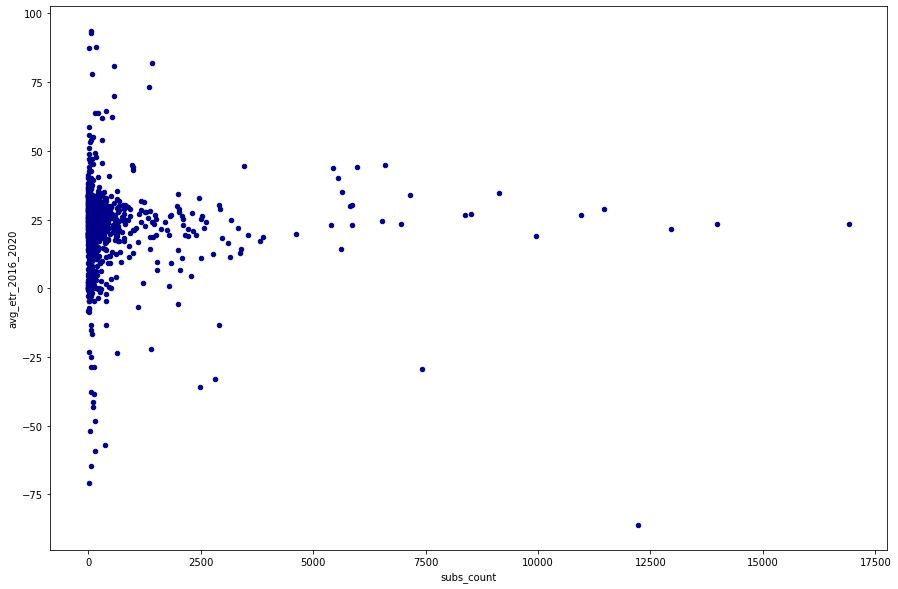

In [536]:
df_financials.loc[(df_financials.avg_etr_2016_2020 >  -100) & (df_financials.avg_etr_2016_2020 <  100)][["subs_count","avg_etr_2016_2020"]].plot.scatter(figsize=(15,10), x="subs_count",y="avg_etr_2016_2020",c='DarkBlue')

In [537]:
pd.DataFrame(df_financials.loc[(df_financials.avg_etr_2016_2020 >  -100) & (df_financials.avg_etr_2016_2020 <  100)].avg_etr_2016_2020.describe())

,avg_etr_2016_2020
count,1068.000000
mean,21.542113
std,15.363903
min,-86.173061
25%,16.473685
50%,23.399475
75%,29.353790
max,93.623632


In [542]:
df_financials["ETR_20_sign"] = np.sign(df_financials["ETR_20"])

<AxesSubplot:xlabel='ETR_20_sign'>

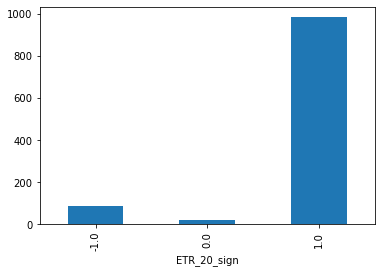

In [544]:
df_financials.groupby(by="ETR_20_sign").size().plot.bar()

<AxesSubplot:xlabel='ETR_20_sign'>

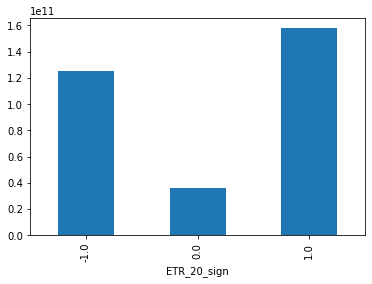

In [545]:
df_financials.groupby(by="ETR_20_sign").mcap_nok.mean().plot.bar()
# No 

If more complex simply means larger, than we are basically saying that larger companies are more risky because they are more complex. Coplex for its size is a better metric I think. Perhaps it should be a rank of subs per country compared to 99 closest mcap companies. Score 1-10. Where 10 is most complex

In [607]:
# n number of neighbours, l list of numbers to look through, i index of the number, x=l[i], we are comparing with
# find_closest(n = 2,[1,4,9,16,25], index = 0) -> [1,4,9] (x = 1)
# find_closest(n = 2,[1,4,9,16,25], index = 1) -> [1,4,9] (x = 4)
# find_closest(n = 2,[1,4,9,16,25], index = 2) -> [1,4,9] (x = 9)
# find_closest(n = 2,[1,4,9,16,25], index = 3) -> [4,9,16] (x = 16)
# find_closest(n = 2,[1,4,9,16,25], index = 4) -> [9,16,25] (x = 25)
# list must be sorted

def find_closest(n: int, l, i: int):
    x = l[i]
    shift_f = min(0, i - n//2)
    shift_b = max(0,(i + n//2 + n%2)-(len(l)-1))
    start = i - n//2 - shift_f - shift_b
    stop = i + n//2 + n%2 - shift_f - shift_b
    
    done_shift = False
    
    while not done_shift:
        if start > 0 and (abs(l[start-1] - x) < abs(l[stop] - x)):
            start -= 1
            stop -= 1
        elif stop < len(l)-1 and (abs(l[stop+1] - x) < abs(l[start] - x)):
            start += 1
            stop += 1
        else:
            done_shift = True
    
    return l[start:stop+1], start, stop

In [608]:
mcap_list = list(df_financials.mcap_nok.sort_values())

In [609]:
find_closest(n=99, l=mcap_list, i=1000)

([154504812885.8829,
  155255935018.8858,
  156001837928.8077,
  156214254504.8044,
  157515788005.1657,
  159520545858.8134,
  160445029041.2922,
  160492728137.1916,
  160645671974.0435,
  161578271040.1123,
  161788720795.3409,
  162691884819.723,
  163543119954.3268,
  164262074159.2633,
  164277409819.059,
  164313019666.9577,
  164861978916.4153,
  165209151316.9979,
  166211847292.8499,
  166696289152.4442,
  166989982730.9569,
  166996903328.7951,
  169885972046.027,
  170347250528.27,
  171454816123.7571,
  174022775453.0786,
  175762956450.0917,
  177624825220.9362,
  179208875973.5664,
  180904831598.4492,
  180988604165.2796,
  181832070573.5476,
  182850523570.6396,
  183175468004.4221,
  186735074376.0099,
  187383814385.6401,
  188621039000.0762,
  189944846667.518,
  190921505558.4727,
  192947737740.2831,
  193652011109.8387,
  194584944972.3923,
  194902347076.565,
  196975198057.6,
  199841128854.103,
  204281451334.4009,
  205110567850.8553,
  210539896557.5151,
  2

In [611]:
df_financials["subs_per_country"] = df_financials["subs_count"]/df_financials["subs_country_count"]

df_financials.groupby("subsector").subs_per_country.mean()

subsector
Asset Managers and Custodians                     48.079636
Banks                                             80.377389
Closed End Investments                             8.476923
Consumer Lending                                  14.235782
Diversified Financial Services                    16.521653
Financial Data Providers                           7.293148
Full Line Insurance                               26.918382
Insurance Brokers                                 14.155861
Investment Services                               17.973038
Life Insurance                                    43.075934
Mortgage Finance                                  19.224563
Mortgage REITs: Commercial                        63.541667
Mortgage REITs: Diversified                       23.750000
Mortgage REITs: Residential                       59.633333
Open End and Miscellaneous Investment Vehicles    12.666667
Property and Casualty Insurance                   13.975660
Reinsurance                   

In [613]:
df_financials[["mcap_nok","subs_per_country"]].sort_values("mcap_nok")

,mcap_nok,subs_per_country
9275,5.528744e+07,2.750000
4329,1.658229e+08,5.500000
6782,1.870465e+08,1.000000
7956,2.294068e+08,2.500000
5275,2.580944e+08,1.000000
...,...,...
1095,4.303772e+12,118.571429
1698,4.854687e+12,219.762712
160,5.503788e+12,128.718310
1568,5.848707e+12,248.808824


In [678]:
mcap_sorted_list = list(df_financials[["mcap_nok","subs_per_country"]].sort_values("mcap_nok").mcap_nok)
subs_per_country_sorted_by_mcap_list = list(df_financials[["mcap_nok","subs_per_country"]].sort_values("mcap_nok").subs_per_country)

complexity_score = []

for i, el in enumerate(subs_per_country_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    subs_per_country_sorted_by_mcap_list_i = subs_per_country_sorted_by_mcap_list[start:stop+1]
    subs_per_country_sorted_by_mcap_list_i.sort()
    complexity_score.append(subs_per_country_sorted_by_mcap_list_i.index(el)+1)

In [655]:
df_financials_mcap_sorted = df_financials.sort_values("mcap_nok")

df_financials_mcap_sorted["complexity_score"] = complexity_score

df_financials_mcap_sorted[["mcap_nok", "subs_count", "subs_country_count", "subs_per_country", "complexity_score"]].tail(25)

,mcap_nok,subs_count,subs_country_count,subs_per_country,complexity_score
488,9.937244e+11,10967.0,93.0,117.924731,84
897,1.066917e+12,334.0,42.0,7.952381,17
4685,1.081488e+12,130.0,14.0,9.285714,20
1506,1.286917e+12,5968.0,82.0,72.780488,75
652,1.304346e+12,9951.0,46.0,216.326087,96
5238,1.325361e+12,215.0,22.0,9.772727,23
1748,1.337510e+12,677.0,10.0,67.700000,73
6373,1.400996e+12,656.0,15.0,43.733333,62
2438,1.426970e+12,431.0,16.0,26.937500,47
2270,1.500042e+12,2980.0,17.0,175.294118,92


In [656]:
df_financials_mcap_sorted.columns

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', 'ETR_20', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy', 'Compexity score',
       'log_mcap_nok', 'mcap_fin_binned', 'ETR_20_sign', 'subs_per_country',
       'complexity_score'],
      dtype='object')

Next up, we want to define a ZT-link score. This will be based on 'rev_zt', 'subs_zt', 'subs_zt_count'(maybe), and compare within mcap group (because leger companies, that are more complex, might have a higher chance of having some ZT-link.
ZT-link score = 'rev_zt'/'rev_zt'.mean()+'subs_zt'

In [691]:
df_financials_mcap_sorted["ZT_link"] = df_financials_mcap_sorted['rev_zt']/df_financials_mcap_sorted.rev_zt.mean()+df_financials_mcap_sorted["subs_zt"]
df_financials_mcap_sorted

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,...,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy,Compexity score,log_mcap_nok,mcap_fin_binned,ETR_20_sign,subs_per_country,complexity_score,ZT_link
9275,866840,Cayman Islands,Financials,Financial Data Providers,5.528744e+07,NaN,NaN,4.0,11.0,452.549037,...,NaN,23.720833,NaN,0.733966,7.742626,"(0, 1e+9]",NaN,2.750000,22,NaN
4329,1459336,Australia,Financials,Diversified Financial Services,1.658229e+08,10.282432,0.000000,2.0,11.0,452.549037,...,1.371067,23.720833,NaN,0.325624,8.219644,"(0, 1e+9]",1.0,5.500000,52,0.000000
6782,41290456,Kenya,Financials,Investment Services,1.870465e+08,0.000000,0.000000,1.0,1.0,452.549037,...,3.771678,23.720833,NaN,0.014615,8.271950,"(0, 1e+9]",1.0,1.000000,1,0.000000
7956,815444,Italy,Financials,Investment Services,2.294068e+08,0.000000,0.000000,2.0,5.0,452.549037,...,5.974026,23.720833,NaN,0.143062,8.360606,"(0, 1e+9]",1.0,2.500000,19,0.000000
5275,18330799,India,Financials,Mortgage Finance,2.580944e+08,0.000000,0.000000,1.0,1.0,452.549037,...,-2.698243,23.720833,NaN,0.014133,8.411779,"(0, 1e+9]",1.0,1.000000,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,348768,United States,Financials,Investment Services,4.303772e+12,38.267504,0.024939,49.0,5810.0,452.549037,...,-4.001983,23.720833,1.0,1783.613827,12.633849,"(1e+12, 1e+13]",1.0,118.571429,80,1.081447
1698,101032,United States,Financials,Banks,4.854687e+12,11.635955,0.000000,59.0,12966.0,452.549037,...,-23.015410,23.720833,1.0,4753.325711,12.686161,"(1e+12, 1e+13]",1.0,219.762712,95,1.000000
160,115691,Germany,Financials,Banks,5.503788e+12,1280.598690,0.257271,71.0,9139.0,452.549037,...,87.224208,23.720833,3.0,3997.358138,12.740662,"(1e+12, 1e+13]",1.0,128.718310,85,1.840213
1568,100312,United States,Financials,Banks,5.848707e+12,23.920263,0.000000,68.0,16919.0,452.549037,...,-10.659565,23.720833,0.0,7058.327672,12.767060,"(1e+12, 1e+13]",1.0,248.808824,96,1.000000


In [711]:
df_financials_mcap_sorted.groupby("subsector").rev_zt.describe()

,count,mean,std,min,25%,50%,75%,max
subsector,,,,,,,,
Asset Managers and Custodians,104.0,1.445159,7.202424,0.000000,0.000000,0.000000,0.002615,48.979152
Banks,474.0,0.185997,3.537226,0.000000,0.000000,0.000000,0.000000,76.832289
Closed End Investments,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Consumer Lending,54.0,0.001036,0.007615,0.000000,0.000000,0.000000,0.000000,0.055958
Diversified Financial Services,73.0,0.051494,0.177900,0.000000,0.000000,0.000000,0.000000,0.856790
Financial Data Providers,17.0,0.031959,0.090013,0.000000,0.000000,0.000000,0.029414,0.371217
Full Line Insurance,39.0,0.367919,2.285865,0.000000,0.000000,0.000000,0.000000,14.276998
Insurance Brokers,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Investment Services,112.0,0.006451,0.035350,0.000000,0.000000,0.000000,0.000000,0.326015


In [695]:
mcap_sorted_list = list(df_financials_mcap_sorted.index)
ZT_link_sorted_by_mcap_list = list(df_financials_mcap_sorted.ZT_link.fillna(0))


ZT_link_score = []

for i, el in enumerate(ZT_link_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    ZT_link_sorted_by_mcap_list_i = ZT_link_sorted_by_mcap_list[start:stop+1]
    ZT_link_sorted_by_mcap_list_i.sort()
    ZT_link_score.append(ZT_link_sorted_by_mcap_list_i.index(el)+1)
    
df_financials_mcap_sorted["ZT_link_score"] = ZT_link_score

In [700]:
df_financials_mcap_sorted[["mcap_nok", "rev_zt", "subs_zt", "ZT_link_score"]].head(50)

,mcap_nok,rev_zt,subs_zt,ZT_link_score
9275,5.528744e+07,NaN,1,1
4329,1.658229e+08,0.000000,0,1
6782,1.870465e+08,0.000000,0,1
7956,2.294068e+08,0.000000,0,1
5275,2.580944e+08,0.000000,0,1
8084,2.648887e+08,0.000000,0,1
4767,2.769955e+08,0.000000,1,86
5477,2.906100e+08,0.000000,1,86
4321,3.339263e+08,0.000000,1,86
9079,3.877909e+08,NaN,0,1


<AxesSubplot:xlabel='mcap_fin_binned'>

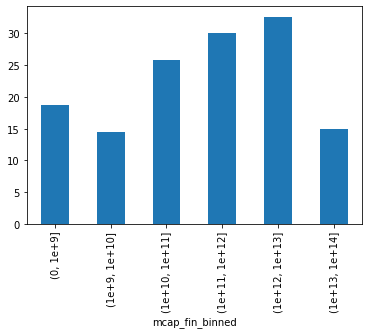

In [702]:
df_financials_mcap_sorted.groupby(by="mcap_fin_binned").ZT_link_score.mean().plot.bar()
# A lot of 1's shifting the score down
# Perhaps we should include non domestic revenue pct as a part of complexity score?

<AxesSubplot:xlabel='mcap_fin_binned'>

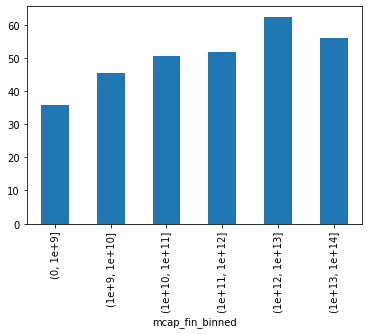

In [703]:
df_financials_mcap_sorted.groupby(by="mcap_fin_binned").complexity_score.mean().plot.bar()

In [713]:
df_financials_mcap_sorted.columns

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', 'ETR_20', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy', 'Compexity score',
       'log_mcap_nok', 'mcap_fin_binned', 'ETR_20_sign', 'subs_per_country',
       'complexity_score', 'ZT_link', 'ZT_link_score'],
      dtype='object')

In [724]:
df_financials_mcap_sorted.corr('spearman').log_mcap_nok.round(1).sort_values()

organisation_code          -0.2
ETR_20                     -0.1
avg_etr_2016_2020          -0.1
delta_etr_2016_2020        -0.0
stdev_etr_2016_2020        -0.0
complexity_score            0.1
ETR_20_sign                 0.1
rev_zt                      0.1
count_tax_controversy       0.2
rev_nonincorp               0.3
subs_per_country            0.3
ZT_link_score               0.3
ZT_link                     0.4
subs_zt                     0.4
subs_zt_count               0.5
Compexity score             0.6
subs_count                  0.6
subs_country_count          0.6
mcap_nok                    1.0
log_mcap_nok                1.0
avg_sector_subs_count       NaN
subs_zt_sector_avg          NaN
sector_avg_etr_2016_2020    NaN
Name: log_mcap_nok, dtype: float64

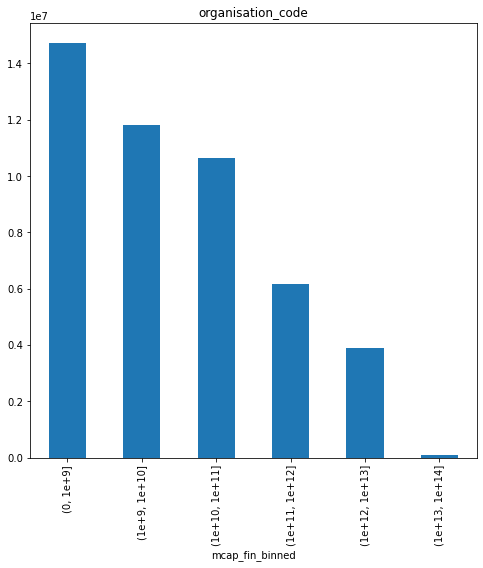

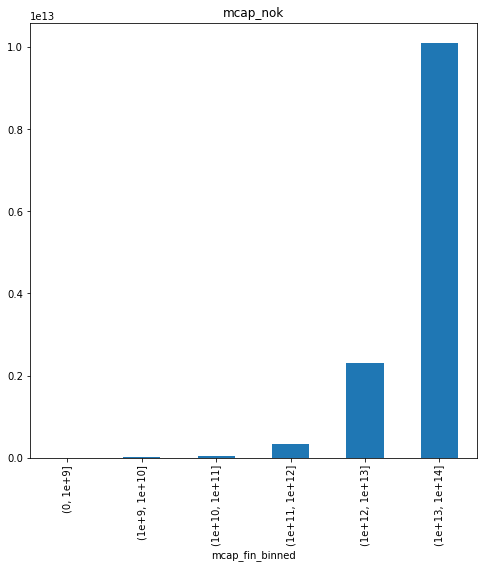

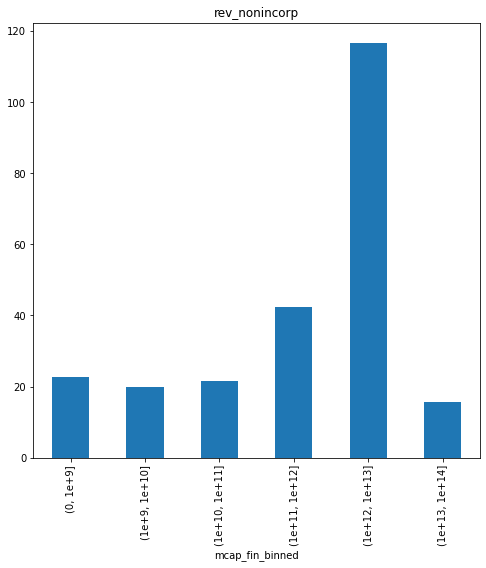

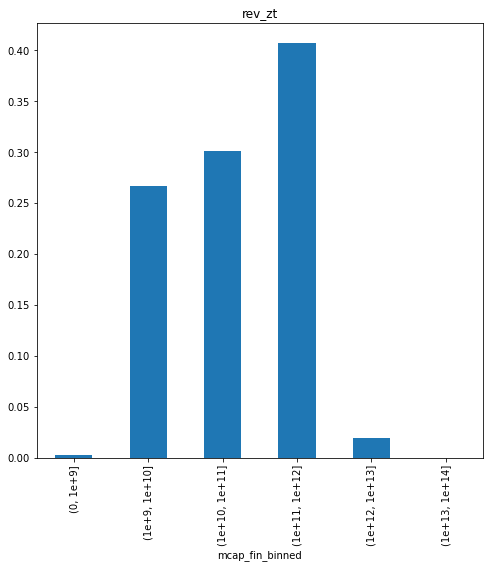

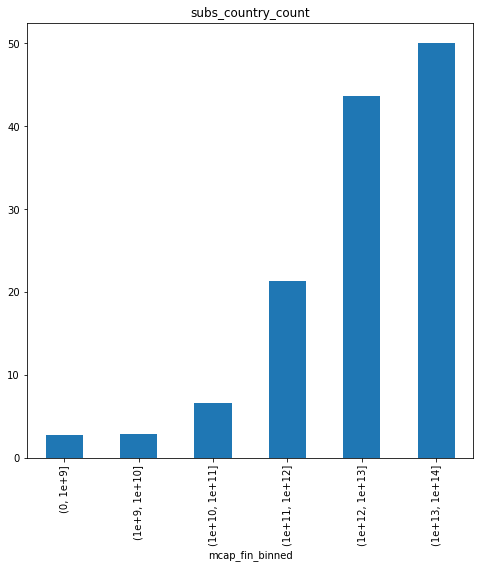

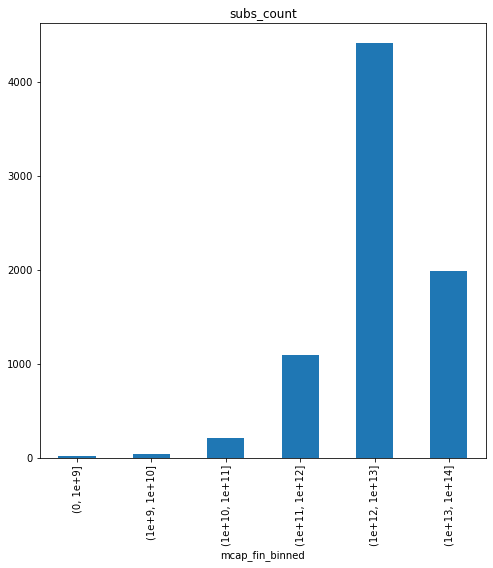

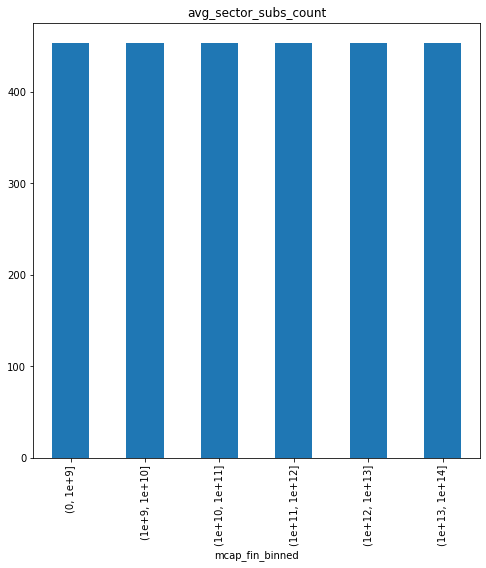

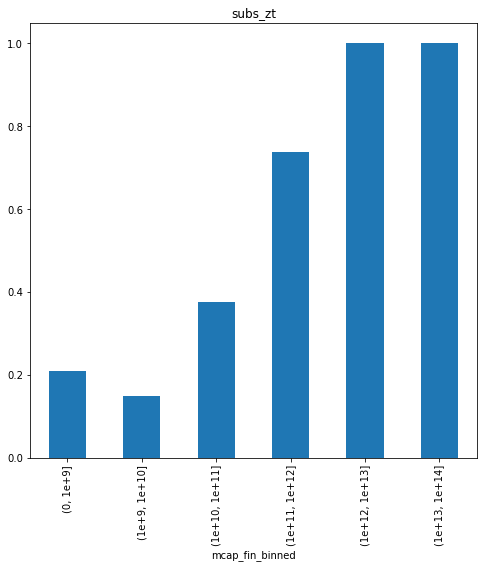

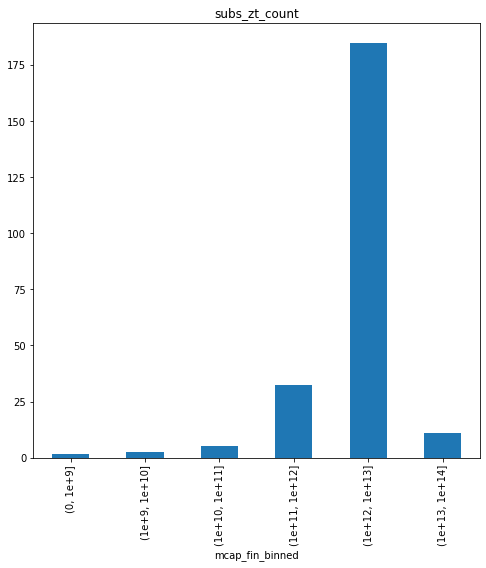

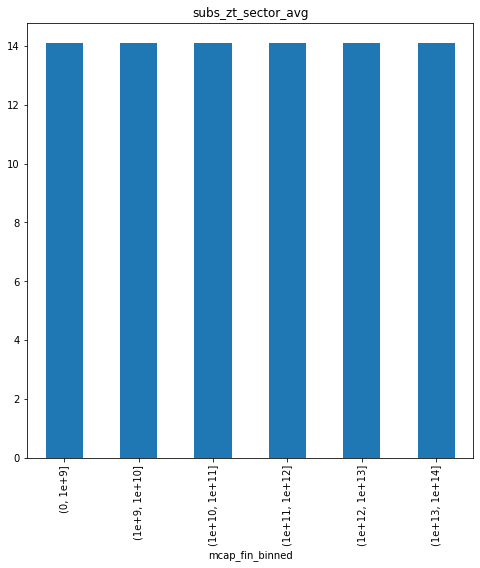

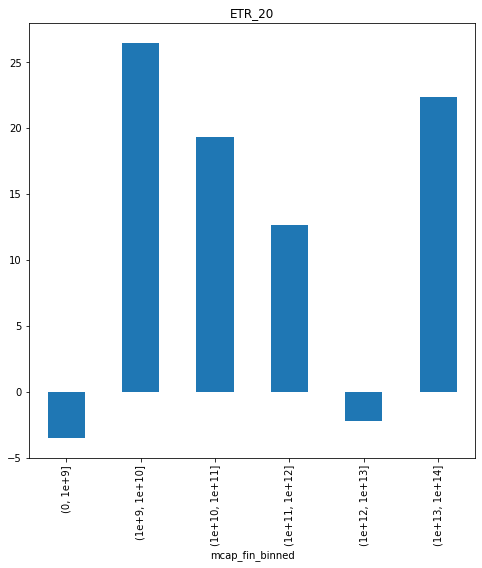

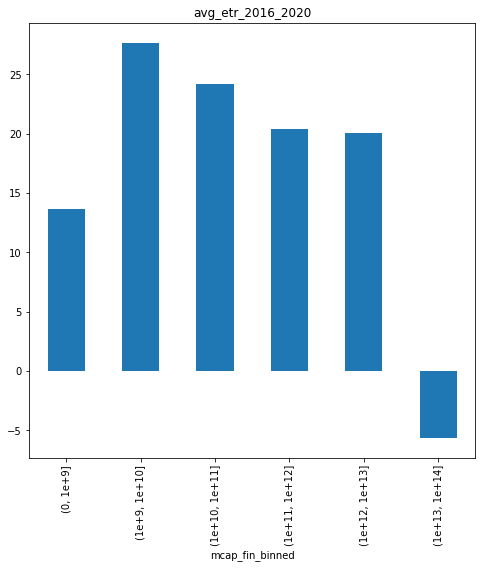

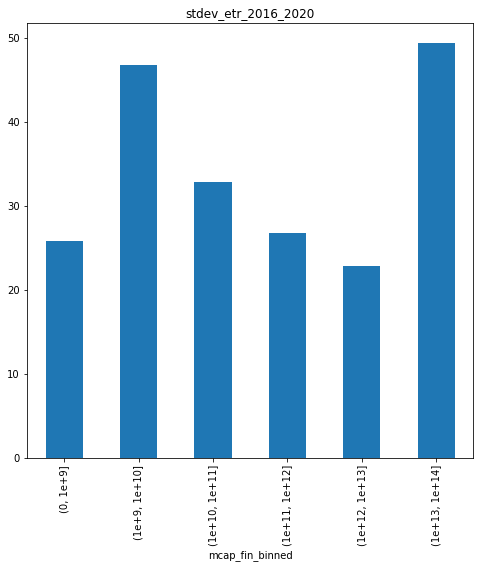

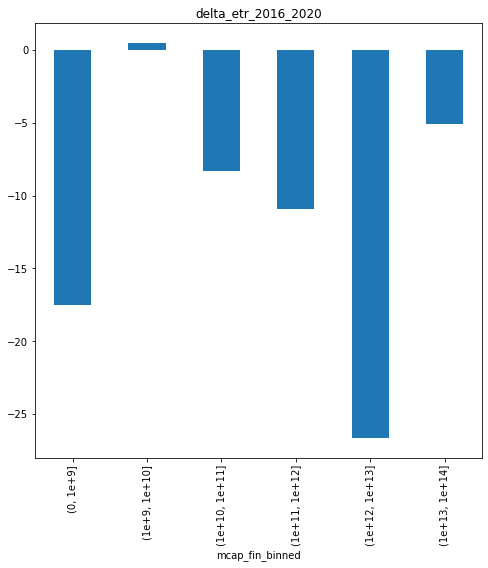

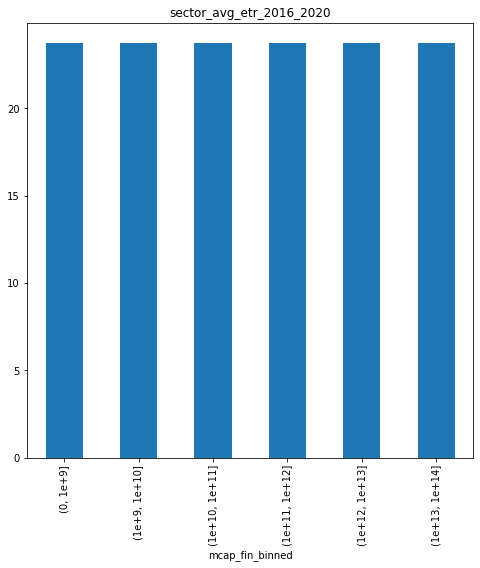

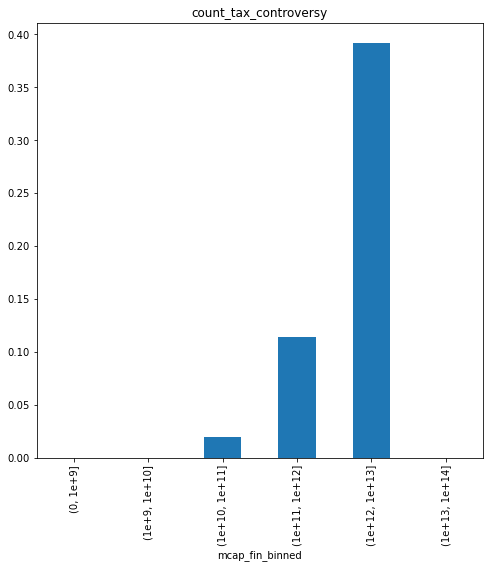

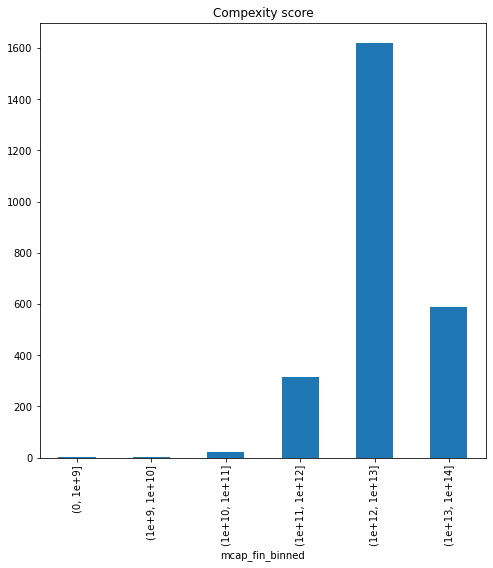

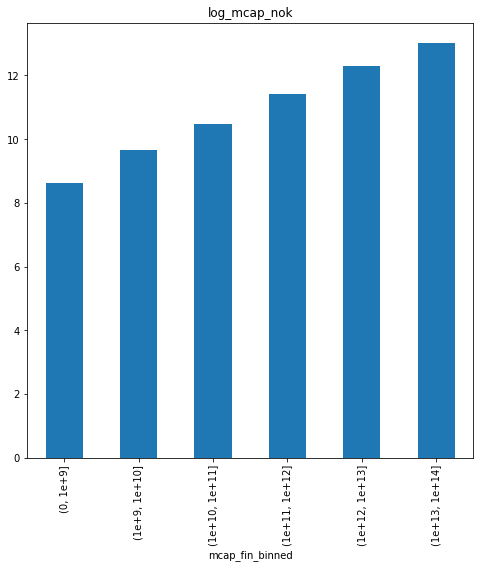

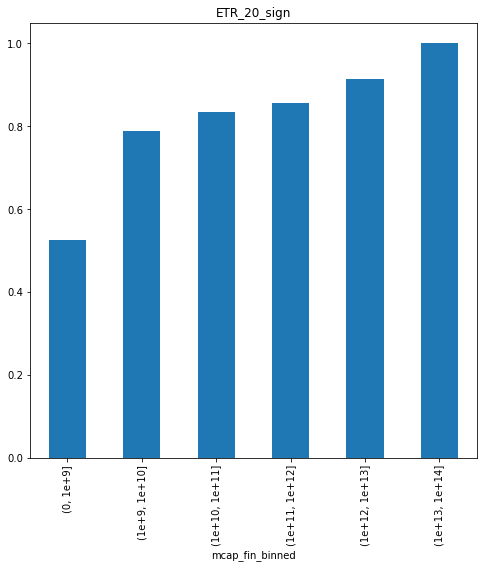

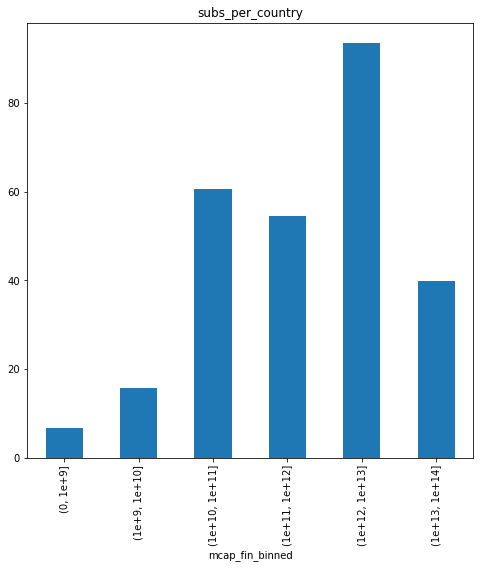

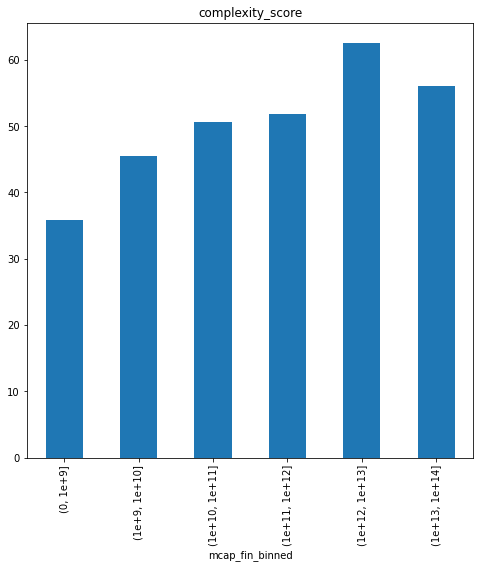

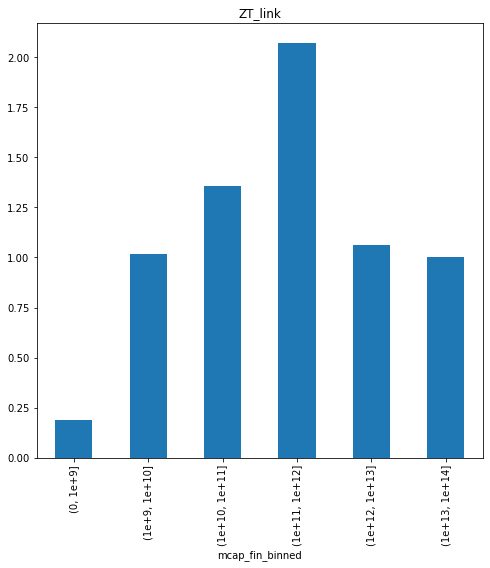

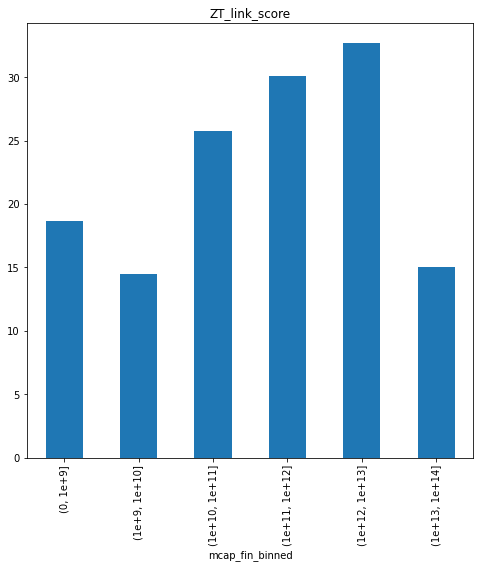

In [720]:
for col in df_financials_mcap_sorted.groupby(by="mcap_fin_binned").mean():
    df_financials_mcap_sorted.groupby(by="mcap_fin_binned").mean()[col].plot(kind='bar', figsize=(8, 8),title=col)
    plt.show()

Next we want an ETR_score, taking in to account ETR20, ETR16_20_avg, ETR16_20_avg, 'stdev_etr_2016_2020', 'delta_etr_2016_2020'
1. ETR20 -> low is indication of avoidance, how to treat 0 or negative values?
2. ETR16_20_avg -> 
3. stdev_etr_2016_2020 -> voletile could mean avoidance 
4. delta_etr_2016_2020 -> decreasing tax is a potential sign of tax avoidance

In [ ]:
# Let's see if there is any

<AxesSubplot:xlabel='complexity_score', ylabel='ZT_link_score'>

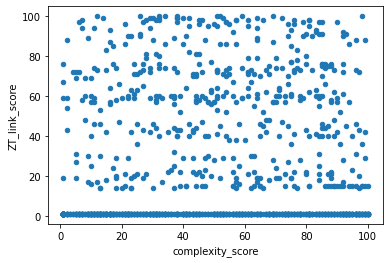

In [727]:
df_financials_mcap_sorted[["complexity_score","ZT_link_score"]].plot.scatter(x="complexity_score",y="ZT_link_score")

In [740]:
df_financials_mcap_sorted.loc[df_financials_mcap_sorted["ZT_link_score"] > 1].complexity_score.count()

480

In [ ]:
# Maybe it does not make sense to compare scores outside peer groups

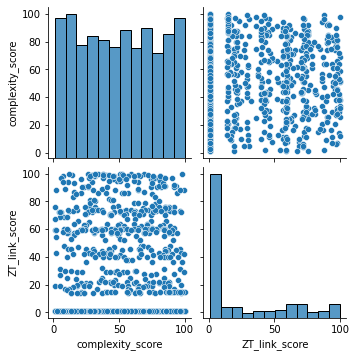

In [741]:
import seaborn as sns

sns.pairplot(df_financials_mcap_sorted[["complexity_score","ZT_link_score"]])

In [743]:
df_financials_mcap_sorted.columns

Index(['organisation_code', 'country_of_incorporation', 'sector', 'subsector',
       'mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', 'ETR_20', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy', 'Compexity score',
       'log_mcap_nok', 'mcap_fin_binned', 'ETR_20_sign', 'subs_per_country',
       'complexity_score', 'ZT_link', 'ZT_link_score'],
      dtype='object')

In [752]:
df_financials_mcap_sorted.loc[(df_financials_mcap_sorted.avg_etr_2016_2020 < 0) | 
                              (df_financials_mcap_sorted.avg_etr_2016_2020.isna()) |
                              (df_financials_mcap_sorted.avg_etr_2016_2020 > 100.1)].shape

(133, 27)

In [751]:
df_financials_mcap_sorted.avg_etr_2016_2020.describe()

count    1089.000000
mean       23.730629
std        89.365740
min      -688.429704
25%        16.255779
50%        23.504295
75%        29.510866
max      1769.776993
Name: avg_etr_2016_2020, dtype: float64